In [1]:
# Importing the data
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)



df = pd.read_csv('hotel_booking.csv')
#df.info()

In [2]:
pd.set_option('display.width', 200)

In [3]:
help(pd.set_option)

Help on CallableDynamicDoc in module pandas._config.config:

<pandas._config.config.CallableDynamicDoc object>
    set_option(pat, value)
    
    Sets the value of the specified option.
    
    Available options:
    
    - compute.[use_bottleneck, use_numba, use_numexpr]
    - display.[chop_threshold, colheader_justify, date_dayfirst, date_yearfirst,
      encoding, expand_frame_repr, float_format]
    - display.html.[border, table_schema, use_mathjax]
    - display.[large_repr, max_categories, max_columns, max_colwidth, max_dir_items,
      max_info_columns, max_info_rows, max_rows, max_seq_items, memory_usage,
      min_rows, multi_sparse, notebook_repr_html, pprint_nest_depth, precision,
      show_dimensions]
    - display.unicode.[ambiguous_as_wide, east_asian_width]
    - display.[width]
    - io.excel.ods.[reader, writer]
    - io.excel.xls.[reader]
    - io.excel.xlsb.[reader]
    - io.excel.xlsm.[reader, writer]
    - io.excel.xlsx.[reader, writer]
    - io.hdf.[default_for

In [4]:
pd.set_option('display.max_columns', None)
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190


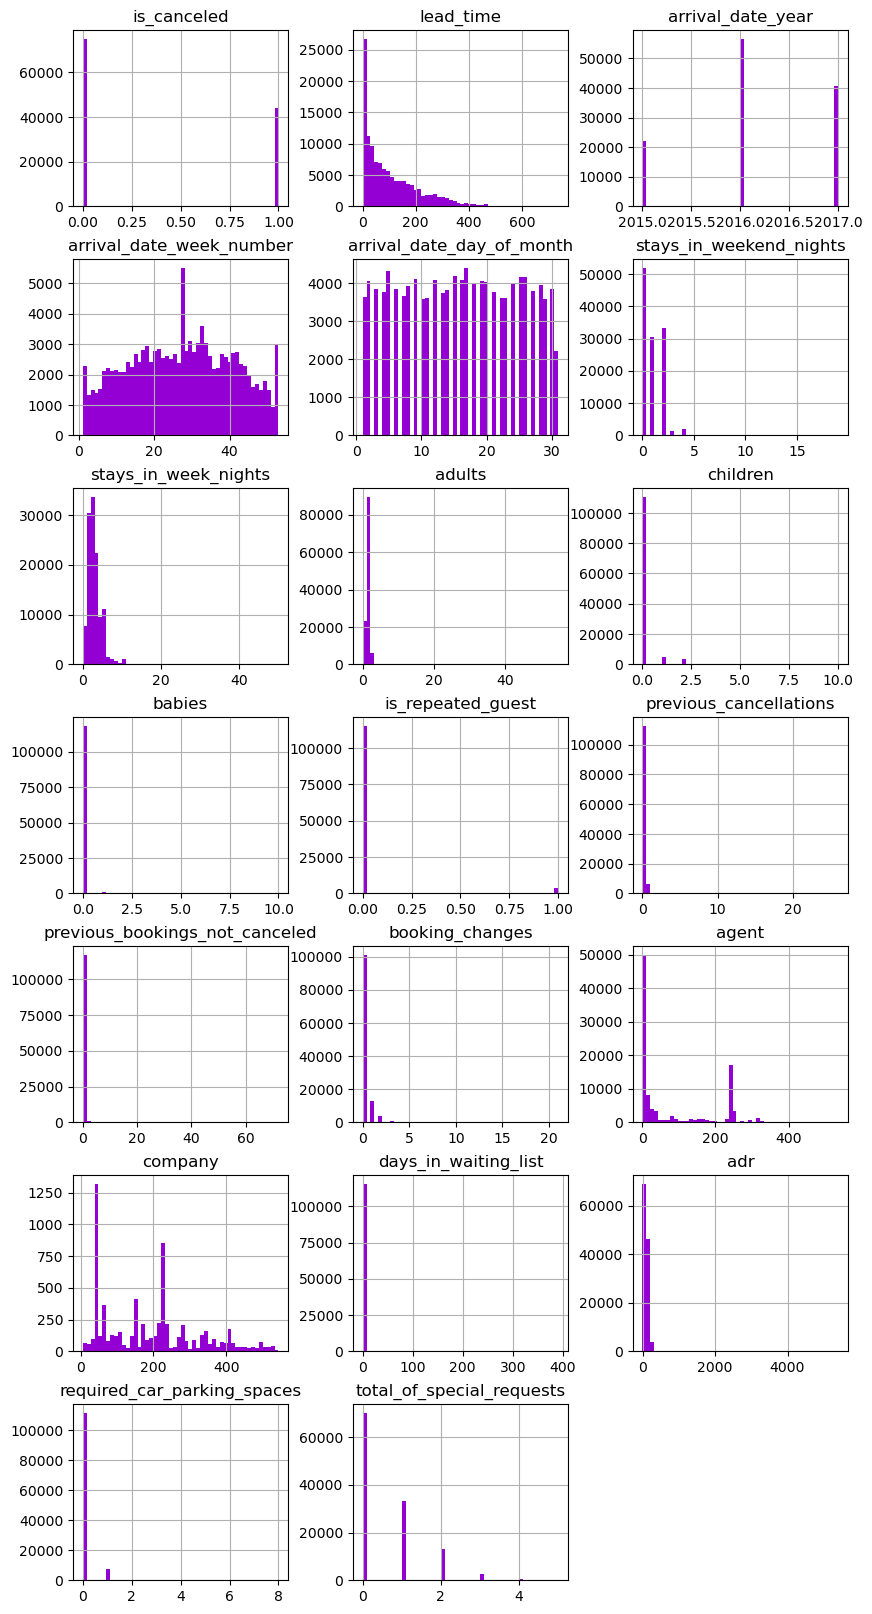

In [6]:
# EDA - Column wise distribution
import matplotlib.pyplot as plt

# Plot histograms
df.hist(bins=50, figsize=(10, 35), color='darkviolet', layout=(12, 3))
plt.show()

In [7]:
#Fill Null values
df['country'].fillna('Other', inplace=True)

# Calculate cancellation ratio for each country
cancellation_ratio = df.groupby('country')['is_canceled'].mean()

# Map cancellation ratio to each country in the 'country' column
df['country_ratio'] = df['country'].map(cancellation_ratio)

top_countries = df['country'].value_counts().nlargest(9).index.tolist()

# Replace countries not in the top 9 with 'Other'
df['country'] = df['country'].apply(lambda x: x if x in top_countries else 'Other')

# Now proceed with the preprocessing pipeline as before...
df.head(10)
#country_cancel_counts = pd.crosstab(df['country'], df['is_canceled'])


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,country_ratio
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,0.566351
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,0.566351
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,0.202243
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,0.202243
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,0.202243
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263,0.202243
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994,0.566351
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729,0.566351
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639,0.566351
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190,0.566351


In [8]:
# Preprocessing Data using Sklearn Pipeline

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
import shap


# Define column lists
numerical_cols = ['lead_time']
numerical_cols_scaling = ['adr']
impute_cols = ['children', 'agent', 'company']
frequent_impute_cols = ['country', 'arrival_date_month']
constant_impute_cols = ['meal']
categorical_cols = ['hotel', 'market_segment', 
                    'distribution_channel', 'reserved_room_type', 'assigned_room_type', 
                    'deposit_type', 'customer_type']
columns_to_drop = ['name', 'email', 'phone-number', 'credit_card', 'reservation_status_date', 'reservation_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['is_canceled']), df['is_canceled'], test_size=0.2, random_state=1)


class Debugger(BaseEstimator, TransformerMixin):

    def transform(self, data):

        # Here you just print what you need + return the actual data. You're not transforming anything. 

        print("Shape of Pre-processed Data:", data.shape)
        print(pd.DataFrame(data).head())
        return data

    def fit(self, data, y=None, **fit_params):

        # No need to fit anything, because this is not an actual  transformation. 

        return self


class FarBook(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Create the 'farbook' feature based on lead_time
        X['farbook'] = (X['lead_time'] > 7).astype(int)
        # Drop the 'lead_time' column
        X.drop(columns=['lead_time'], inplace=True)
        return X
    
# Define preprocessing pipelines
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    #('scaler', StandardScaler())
])

numerical_scaling_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
    #,('debugger', Debugger())
])

specific_impute_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])

frequent_impute_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

constant_impute_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Create column transformer to apply pipelines to appropriate columns
preprocessor = ColumnTransformer([
    ('farbook', FarBook(), ['lead_time']),
    ('numerical', numerical_pipeline, numerical_cols),
    ('numerical_scaling', numerical_scaling_pipeline, numerical_cols_scaling),
    ('specific_impute', specific_impute_pipeline, impute_cols),
    ('frequent_impute', frequent_impute_pipeline, frequent_impute_cols),
    ('constant_impute', constant_impute_pipeline, constant_impute_cols),
    ('categorical', categorical_pipeline, categorical_cols),
    ('drop_columns', 'drop', columns_to_drop)
], remainder="passthrough")

'''
# to debug the transformed data, use this    
# Fit and transform the data
# X_preprocessed = preprocessor.fit_transform(df)
# X_preprocessed
    
# Null values check
columns_with_nan = X_preprocessed.columns[X_preprocessed.isna().any()].tolist()
rows_with_nan = X_preprocessed[X_preprocessed.isna().any(axis=1)]
print("Columns with NaN values:", columns_with_nan)
print("Rows with NaN values:")
rows_with_nan.head()
'''

# Create a logistic regression model
logistic_regression_model = LogisticRegression()


# Define the pipeline with preprocessing and logistic regression
pipeline_with_logistic_regression = Pipeline([
    ('preprocessor', preprocessor),
    #('debugger', Debugger()),
    ('logistic_regression', logistic_regression_model)
])

# Fit the pipeline on the training data
pipeline_with_logistic_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('farbook', FarBook(),
                                                  ['lead_time']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['lead_time']),
                                                 ('numerical_scaling',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['adr']),
                                                 ('specific_impute',
                                                  Pipeline(steps=[('imputer',
                                                                   Si...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['hotel', 'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type']),
                                                 ('drop_columns', 'drop',
                                                  ['name', 'email',
                                                   'phone-number',
                                                   'credit_card',
                                                   'reservation_status_date',
                                                   'reservation_status'])])),
                ('logistic_regression', LogisticRegression())])

In [9]:
# Defining function to fit and evaluate model

def fit_eval_model(model):
    # Fit the pipeline to the training data
    print('Fitting the model')
    best_params = ''
    try:
        model.fit(X_train, y_train, classifier__verbose = 0)
    except:
        model.fit(X_train, y_train)
    
    try:
        # Extract the best estimator if GridSearchCV is used
        best_score = model.best_score_
        print(f"Best parameters: {model.best_params_}")
        print(f"Best cross-validation accuracy: {best_score}")
        print("")
        #model = model.best_estimator_
        best_params = model.best_params_
    except AttributeError:
        pass

    
    # Get predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy : {accuracy}")

    # Compute classification report
    report = classification_report(y_test, y_pred)
    print(f"Classification Report:\n{report}\n")
    
    return model, y_pred, accuracy, report, best_params

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score


# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression()
    ,'Random Forest': RandomForestClassifier()
    ,'SGDClassifier': SGDClassifier()
    ,'KNN': KNeighborsClassifier()
    ,'Naive Bayes': GaussianNB()
    #,'SVM': SVC()
    ,'Decision Tree': DecisionTreeClassifier()
    ,'XGBoost': XGBClassifier()
    ,'LightGBM': LGBMClassifier()
    ,'CatBoost': CatBoostClassifier()
    ,'AdaBoost': AdaBoostClassifier()
    ,'Bagging Classifier': BaggingClassifier()
}
results = {}
# Fit and evaluate each classifier
for name, classifier in classifiers.items():
    print(f"Training and evaluating {name}...")
    
    # Create a pipeline for the current classifier
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    k = fit_eval_model(pipeline)    
    results[name] = k

print('Accuracy   | Model')
for i in results.keys():
    print(" ",round(results[i][2],2), "    |", i)

Training and evaluating Logistic Regression...
Fitting the model
Accuracy : 0.7881732138370048
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84     15101
           1       0.79      0.57      0.67      8777

    accuracy                           0.79     23878
   macro avg       0.79      0.74      0.76     23878
weighted avg       0.79      0.79      0.78     23878


Training and evaluating Random Forest...
Fitting the model
Accuracy : 0.8965575006281933
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     15101
           1       0.88      0.83      0.85      8777

    accuracy                           0.90     23878
   macro avg       0.89      0.88      0.89     23878
weighted avg       0.90      0.90      0.90     23878


Training and evaluating SGDClassifier...
Fitting the model
Accuracy : 0.38646452801742187
Classification Report:
 

In [11]:
# Hyperparameter Optimization using GridSearchCV and RandomizedSearchCV

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time


start_time = time.time()
# Define parameter grids for each classifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['is_canceled']), df['is_canceled'], test_size=0.99, random_state=1)

classifiers_param_grids = {
'XGBoost': [XGBClassifier(n_jobs=-1),{
    'classifier__eta': [0.1,0.2, 0.3, 0.5],
    'classifier__max_depth': [4,5,6,7,8],
    'classifier__min_child_weight': [1, 3, 5], 
    'classifier__subsample': [0.5, 0.8, 1.0],
    'classifier__colsample_bytree': [0.5, 0.8, 1.0]
}]
}


classifiers_param_grids_base = {
    'Logistic Regression': [LogisticRegression(),{
        'classifier__C': [1, 10]
        ,'classifier__solver': ['newton-cholesky','liblinear']
        ,'classifier__penalty': ['l1', 'l2']
        ,'classifier__class_weight': [None, 'balanced']
    }],
    'Random Forest': [RandomForestClassifier(n_jobs=-1),{
     'classifier__n_estimators': [100],
     'classifier__criterion': ['log_loss'], #['gini', 'entropy', 'log_loss'],
     'classifier__max_features': [0.2], #, 'sqrt'], #['sqrt', 'log2', 0.2],
     'classifier__oob_score': [True], #['sqrt', 'log2', 0.2],
     'classifier__min_samples_leaf': [1], #['sqrt', 'log2', 0.2],
    
   # 'classifier__max_depth': [None],
   # 'classifier__min_samples_split': [2,4],
   # 'classifier__bootstrap': [True, False],
   # 'classifier__max_samples': [None, 0.9],
   # 'classifier__min_samples_leaf': [2,4]
}],
#    'SGDClassifier': [SGDClassifier(),{'classifier__alpha': [0.001, 0.01, 0.05, 0.1]}],
    'XGBoost': [XGBClassifier(),{'classifier__max_depth': [3, 5, 7]}],
    'LightGBM': [LGBMClassifier(),{'classifier__max_depth': [3, 5, 7]}],
    'CatBoost': [CatBoostClassifier(),{'classifier__depth': [3, 5, 7]}],
    'Bagging Classifier': [BaggingClassifier(),{'classifier__n_estimators': [2, 5,10, 15]}]
}

results_grid = {}
# Perform GridSearchCV for each classifier
for name, classifier in classifiers_param_grids.items():
    print(f"Training and optimizing {name}...")
    
    # Create a pipeline for the current classifier
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', classifier[0])
    ])
    
    # Perform GridSearchCV
    #grid_search = GridSearchCV(pipeline, classifiers_param_grids[name][1], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search = RandomizedSearchCV(pipeline, classifiers_param_grids[name][1], cv=5, n_iter = 20 ,scoring='accuracy', n_jobs=-1)


    # Evaluate the best model using the fit_eval_pipeline function
    k = fit_eval_model(grid_search)
    results_grid[name] = k

print("Elapsed time:", time.time()-start_time, "seconds")    
print('Accuracy   | Model')
for i in results_grid.keys():
    print(" ",round(results_grid[i][2],2), "    |", i)

Training and optimizing XGBoost...
Fitting the model
Best parameters: {'classifier__subsample': 1.0, 'classifier__min_child_weight': 3, 'classifier__max_depth': 6, 'classifier__eta': 0.1, 'classifier__colsample_bytree': 0.5}
Best cross-validation accuracy: 0.8374072641608945

Accuracy : 0.8407996818870191
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     74406
           1       0.82      0.73      0.77     43791

    accuracy                           0.84    118197
   macro avg       0.84      0.82      0.82    118197
weighted avg       0.84      0.84      0.84    118197


Elapsed time: 9.976481914520264 seconds
Accuracy   | Model
  0.84     | XGBoost


In [12]:
# Hyperparameter Optimization using BayesSearchCV

from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time


start_time = time.time()
# Define parameter grids for each classifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['is_canceled']), df['is_canceled'], test_size=0.75, random_state=1)


#n_estimators=50
classifiers_param_grids = {
    'LightGBM': [LGBMClassifier(),{
        'classifier__num_leaves': Integer(30, 40),
        'classifier__boosting': ['dart','gbdt'], #'gbdt','rf',
        'classifier__data_sample_strategy': ['bagging'], #,'goss'],
        'classifier__max_depth': Integer(5, 15),
        'classifier__learning_rate': Real(0.01, 0.4, prior = 'log-uniform'),
        'classifier__n_estimators': Integer(30, 200, prior = 'log-uniform'),
        'classifier__subsample': Real(0.1, 1.0),
        'classifier__colsample_bytree': Real(0.8, 1.0),
        'classifier__min_child_samples': Integer(10, 30),
        'classifier__reg_alpha': Real(0.0001, 1.0, prior = 'log-uniform'),
        'classifier__reg_lambda': Real(0.0001, 1.0, prior = 'log-uniform'),
        'classifier__min_split_gain': Real(0.0001, 1.0, prior = 'log-uniform'),
        'classifier__min_child_weight': Real(0.0001, 100, prior = 'log-uniform'),
        'classifier__min_data_in_leaf': Integer(5, 30)
}]
    

}


classifiers_param_grids_base = {
    'Logistic Regression': [LogisticRegression(),{
        'classifier__C': [1, 10]
        ,'classifier__solver': ['newton-cholesky','liblinear']
        ,'classifier__penalty': ['l1', 'l2']
        ,'classifier__class_weight': [None, 'balanced']
    }],
    'Random Forest': [RandomForestClassifier(n_jobs=-1),{
     'classifier__n_estimators': [100],
     'classifier__criterion': ['log_loss'], #['gini', 'entropy', 'log_loss'],
     'classifier__max_features': [0.2], #, 'sqrt'], #['sqrt', 'log2', 0.2],
     'classifier__oob_score': [True], #['sqrt', 'log2', 0.2],
     'classifier__min_samples_leaf': [1], #['sqrt', 'log2', 0.2],
    
   # 'classifier__max_depth': [None],
   # 'classifier__min_samples_split': [2,4],
   # 'classifier__bootstrap': [True, False],
   # 'classifier__max_samples': [None, 0.9],
   # 'classifier__min_samples_leaf': [2,4]
}],
#    'SGDClassifier': [SGDClassifier(),{'classifier__alpha': [0.001, 0.01, 0.05, 0.1]}],
    'XGBoost': [XGBClassifier(n_jobs=-1),{
    'classifier__eta': Real(0.1, 0.29), #[0.1,0.2, 0.3, 0.5] 
    'classifier__max_depth': Integer(10, 100),
    'classifier__min_child_weight': Integer(1, 2), 
    'classifier__subsample': Real(0.01, 1.0), #[0.5, 0.8, 1.0],
    'classifier__colsample_bytree': Real(0.01, 1.0), #[0.5, 0.8, 1.0]
}],
    'LightGBM': [LGBMClassifier(),{'classifier__max_depth': [3, 5, 7]}],
    'CatBoost': [CatBoostClassifier(),{'classifier__learning_rate': [0.25], #Real(0.2, 0.99),
                                                      'classifier__iterations': Integer(10, 1000, prior = 'log-uniform'),
                                                      #'classifier__depth': Integer(5, 15),
                                                      #'classifier__l2_leaf_reg': Integer(3, 20),
                                                      'classifier__loss_function': ['Logloss', 'CrossEntropy'], #'Logloss',
                                                      #'classifier__eval_metric': ['Accuracy','AUC'], #'Accuracy', 
                                                      #'classifier__bootstrap_type': ['Bayesian', 'Bernoulli', 'MVS'],  # Bootstrap type
                                                      #'classifier__langevin': [True, False],
                                                      #'classifier__leaf_estimation_iterations' : Integer(1, 10)
                                      }],
    'Bagging Classifier': [BaggingClassifier(),{'classifier__n_estimators': [2, 5,10, 15]}]
}

results_grid = {}
# Perform GridSearchCV for each classifier
for name, classifier in classifiers_param_grids.items():
    print(f"Training and optimizing {name}...")
    
    # Create a pipeline for the current classifier
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', classifier[0])
    ])
    
    # Perform GridSearchCV
    #grid_search = GridSearchCV(pipeline, classifiers_param_grids[name][1], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search = BayesSearchCV(pipeline, classifiers_param_grids[name][1], cv=3, n_iter = 30 ,scoring='accuracy', n_jobs=-1, verbose=3)


    # Evaluate the best model using the fit_eval_pipeline function
    k = fit_eval_model(grid_search)
    results_grid[name] = k

print("Elapsed time:", time.time()-start_time, "seconds")    
print('Accuracy   | Model')
for i in results_grid.keys():
    print(" ",round(results_grid[i][2],2), "    |", i)

Training and optimizing LightGBM...
Fitting the model
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fi

In [13]:
pr = pd.DataFrame(k[0].cv_results_).sort_values(by='rank_test_score')
pr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__boosting,param_classifier__colsample_bytree,param_classifier__data_sample_strategy,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__min_child_samples,param_classifier__min_child_weight,param_classifier__min_data_in_leaf,param_classifier__min_split_gain,param_classifier__n_estimators,param_classifier__num_leaves,param_classifier__reg_alpha,param_classifier__reg_lambda,param_classifier__subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,2.943572,0.185582,0.185956,0.001990,dart,1.0,bagging,0.4,15,19,0.0001,28,0.0001,163,30,0.0001,1.0,0.385292,"{'classifier__boosting': 'dart', 'classifier__...",0.875063,0.874661,0.866419,0.872047,0.003983,1
17,3.236147,0.089284,0.189444,0.004448,dart,1.0,bagging,0.277619,6,15,1.202342,14,1.0,200,39,0.001816,0.000153,0.698979,"{'classifier__boosting': 'dart', 'classifier__...",0.872550,0.872047,0.866318,0.870305,0.002827,2
20,0.555069,0.059393,0.139081,0.010062,gbdt,0.94048,bagging,0.276586,5,10,0.0001,10,0.0001,78,30,0.000621,1.0,0.82996,"{'classifier__boosting': 'gbdt', 'classifier__...",0.873455,0.872248,0.864509,0.870071,0.003963,3
7,0.574077,0.052133,0.143537,0.009941,gbdt,0.918892,bagging,0.357027,8,26,0.344263,19,0.003441,66,30,0.208557,0.000219,0.38603,"{'classifier__boosting': 'gbdt', 'classifier__...",0.872651,0.871545,0.864811,0.869669,0.003465,4
26,1.324160,0.088258,0.183034,0.041418,gbdt,0.998929,bagging,0.4,12,14,0.001033,5,0.001141,200,36,1.0,0.000156,0.892809,"{'classifier__boosting': 'gbdt', 'classifier__...",0.870942,0.870439,0.866318,0.869233,0.002071,5
13,2.139120,0.083449,0.177861,0.007371,dart,1.0,bagging,0.170115,15,11,16.811525,22,0.0001,128,38,0.0001,1.0,0.1,"{'classifier__boosting': 'dart', 'classifier__...",0.872651,0.868530,0.866318,0.869166,0.002624,6
11,0.582469,0.022436,0.152482,0.011493,dart,1.0,bagging,0.4,15,30,0.0001,5,0.0001,30,30,1.0,1.0,0.1,"{'classifier__boosting': 'dart', 'classifier__...",0.870540,0.870841,0.865112,0.868831,0.002633,7
0,1.112222,0.044467,0.149971,0.006467,dart,0.885755,bagging,0.179734,15,15,5.188978,16,0.002934,80,36,0.055163,0.004964,0.224406,"{'classifier__boosting': 'dart', 'classifier__...",0.870238,0.868932,0.865916,0.868362,0.001810,8
3,1.005796,0.042346,0.156926,0.020067,dart,0.828002,bagging,0.370093,7,13,0.000209,16,0.016909,31,38,0.056013,0.00106,0.614949,"{'classifier__boosting': 'dart', 'classifier__...",0.872651,0.870439,0.861996,0.868362,0.004591,8
15,1.173785,0.166877,0.141356,0.018618,dart,0.87305,bagging,0.153194,14,17,0.457103,17,0.0001,84,33,0.009691,0.000364,1.0,"{'classifier__boosting': 'dart', 'classifier__...",0.870841,0.869133,0.864710,0.868228,0.002584,10


In [14]:
bestparams = dict(pr['params'][0])
bestparams

{'classifier__boosting': 'dart',
 'classifier__colsample_bytree': 0.8857554476781156,
 'classifier__data_sample_strategy': 'bagging',
 'classifier__learning_rate': 0.17973394547040478,
 'classifier__max_depth': 15,
 'classifier__min_child_samples': 15,
 'classifier__min_child_weight': 5.188977603242558,
 'classifier__min_data_in_leaf': 16,
 'classifier__min_split_gain': 0.002933663817049707,
 'classifier__n_estimators': 80,
 'classifier__num_leaves': 36,
 'classifier__reg_alpha': 0.05516256098308567,
 'classifier__reg_lambda': 0.004963851387199245,
 'classifier__subsample': 0.2244063074596714}

In [15]:
print('Accuracy   | Model')
for i in results.keys():
    print(" ",round(results[i][2],3), "    |", i)

    
print('\n\n\nGrid Search CV Model Optimization\n') 
print('Accuracy   | Model - Best_Params')
for i in results_grid.keys():
    print(" ",round(results_grid[i][2],3), "    |", i, "", results_grid[i][4])

Accuracy   | Model
  0.788     | Logistic Regression
  0.897     | Random Forest
  0.386     | SGDClassifier
  0.792     | KNN
  0.726     | Naive Bayes
  0.858     | Decision Tree
  0.884     | XGBoost
  0.879     | LightGBM
  0.889     | CatBoost
  0.833     | AdaBoost
  0.885     | Bagging Classifier



Grid Search CV Model Optimization

Accuracy   | Model - Best_Params
  0.878     | LightGBM  OrderedDict([('classifier__boosting', 'dart'), ('classifier__colsample_bytree', 1.0), ('classifier__data_sample_strategy', 'bagging'), ('classifier__learning_rate', 0.4), ('classifier__max_depth', 15), ('classifier__min_child_samples', 19), ('classifier__min_child_weight', 0.0001), ('classifier__min_data_in_leaf', 28), ('classifier__min_split_gain', 0.0001), ('classifier__n_estimators', 163), ('classifier__num_leaves', 30), ('classifier__reg_alpha', 0.0001), ('classifier__reg_lambda', 1.0), ('classifier__subsample', 0.38529176064807913)])


In [16]:
# Training StackingClassifier

from sklearn.ensemble import StackingClassifier

# Stacking Classifier
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['is_canceled']), df['is_canceled'], test_size=0.2, random_state=1)


lr_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression()) #(class_weight = 'balanced', penalty ='l1', solver='newton-cholesky'))
         ])
    
cat_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', CatBoostClassifier())
    ])

lgbm_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LGBMClassifier())
    ])

xgb_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier())
    ])

rf_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(oob_score = True, max_features = 0.2, criterion = 'log_loss'))
    ])


estimators_clf = [('lgbm_clf',lgbm_pipe),('xgb_clf',xgb_pipe),('rf_clf',rf_pipe),('lr_clf',lr_pipe),('cat_clf',cat_pipe)]

for name, estimator in estimators_clf:
    fit_eval_model(estimator)

Fitting the model
[LightGBM] [Info] Number of positive: 35447, number of negative: 60065
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1478
[LightGBM] [Info] Number of data points in the train set: 95512, number of used features: 86
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371126 -> initscore=-0.527389
[LightGBM] [Info] Start training from score -0.527389
Accuracy : 0.8786749308987353
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     15101
           1       0.86      0.80      0.83      8777

    accuracy                           0.88     23878
   macro avg       0.87      0.86      0.87     23878
weighted avg       0.88      0.88      0.88     23878


Fitting the model
Accuracy : 0.884077393416

In [17]:
#clf = StackingClassifier(estimators=estimators_clf, final_estimator=LogisticRegression(), cv ='prefit')
clf = StackingClassifier(estimators=estimators_clf, final_estimator=LogisticRegression())#, cv ='prefit')

r = fit_eval_model(clf)

Fitting the model
[LightGBM] [Info] Number of positive: 35447, number of negative: 60065
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1478
[LightGBM] [Info] Number of data points in the train set: 95512, number of used features: 86
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371126 -> initscore=-0.527389
[LightGBM] [Info] Start training from score -0.527389
Learning rate set to 0.07218
0:	learn: 0.6298224	total: 20.2ms	remaining: 20.2s
1:	learn: 0.5778472	total: 39.7ms	remaining: 19.8s
2:	learn: 0.5396444	total: 58.5ms	remaining: 19.4s
3:	learn: 0.5074310	total: 76.6ms	remaining: 19.1s
4:	learn: 0.4842688	total: 95ms	remaining: 18.9s
5:	learn: 0.4631229	total: 115ms	remaining: 19s
6:	learn: 0.4479022	total: 134ms	remaining: 19.1s
7:	learn: 0.4356153	total: 154ms	remaining: 

154:	learn: 0.2879773	total: 3.43s	remaining: 18.7s
155:	learn: 0.2878998	total: 3.45s	remaining: 18.6s
156:	learn: 0.2878487	total: 3.46s	remaining: 18.6s
157:	learn: 0.2877251	total: 3.48s	remaining: 18.6s
158:	learn: 0.2874211	total: 3.5s	remaining: 18.5s
159:	learn: 0.2872960	total: 3.52s	remaining: 18.5s
160:	learn: 0.2871056	total: 3.54s	remaining: 18.5s
161:	learn: 0.2869911	total: 3.56s	remaining: 18.4s
162:	learn: 0.2867681	total: 3.59s	remaining: 18.4s
163:	learn: 0.2866444	total: 3.61s	remaining: 18.4s
164:	learn: 0.2865727	total: 3.63s	remaining: 18.4s
165:	learn: 0.2864171	total: 3.65s	remaining: 18.3s
166:	learn: 0.2862673	total: 3.67s	remaining: 18.3s
167:	learn: 0.2861272	total: 3.69s	remaining: 18.3s
168:	learn: 0.2858732	total: 3.71s	remaining: 18.3s
169:	learn: 0.2856505	total: 3.73s	remaining: 18.2s
170:	learn: 0.2854745	total: 3.75s	remaining: 18.2s
171:	learn: 0.2853210	total: 3.77s	remaining: 18.2s
172:	learn: 0.2852424	total: 3.79s	remaining: 18.1s
173:	learn: 0

321:	learn: 0.2647468	total: 7.05s	remaining: 14.9s
322:	learn: 0.2646626	total: 7.08s	remaining: 14.8s
323:	learn: 0.2645930	total: 7.11s	remaining: 14.8s
324:	learn: 0.2645160	total: 7.13s	remaining: 14.8s
325:	learn: 0.2643920	total: 7.16s	remaining: 14.8s
326:	learn: 0.2642999	total: 7.18s	remaining: 14.8s
327:	learn: 0.2642173	total: 7.21s	remaining: 14.8s
328:	learn: 0.2641548	total: 7.23s	remaining: 14.7s
329:	learn: 0.2640884	total: 7.25s	remaining: 14.7s
330:	learn: 0.2640325	total: 7.27s	remaining: 14.7s
331:	learn: 0.2639878	total: 7.3s	remaining: 14.7s
332:	learn: 0.2638954	total: 7.32s	remaining: 14.7s
333:	learn: 0.2638357	total: 7.34s	remaining: 14.6s
334:	learn: 0.2637873	total: 7.37s	remaining: 14.6s
335:	learn: 0.2637167	total: 7.39s	remaining: 14.6s
336:	learn: 0.2636349	total: 7.41s	remaining: 14.6s
337:	learn: 0.2635751	total: 7.43s	remaining: 14.6s
338:	learn: 0.2634793	total: 7.45s	remaining: 14.5s
339:	learn: 0.2634081	total: 7.47s	remaining: 14.5s
340:	learn: 0

481:	learn: 0.2517193	total: 10.5s	remaining: 11.3s
482:	learn: 0.2516764	total: 10.5s	remaining: 11.3s
483:	learn: 0.2515579	total: 10.6s	remaining: 11.3s
484:	learn: 0.2514897	total: 10.6s	remaining: 11.2s
485:	learn: 0.2514607	total: 10.6s	remaining: 11.2s
486:	learn: 0.2513826	total: 10.6s	remaining: 11.2s
487:	learn: 0.2513191	total: 10.6s	remaining: 11.2s
488:	learn: 0.2512578	total: 10.7s	remaining: 11.1s
489:	learn: 0.2512099	total: 10.7s	remaining: 11.1s
490:	learn: 0.2511643	total: 10.7s	remaining: 11.1s
491:	learn: 0.2511050	total: 10.7s	remaining: 11.1s
492:	learn: 0.2510553	total: 10.8s	remaining: 11.1s
493:	learn: 0.2509725	total: 10.8s	remaining: 11.1s
494:	learn: 0.2508789	total: 10.8s	remaining: 11s
495:	learn: 0.2507828	total: 10.8s	remaining: 11s
496:	learn: 0.2507594	total: 10.9s	remaining: 11s
497:	learn: 0.2507223	total: 10.9s	remaining: 11s
498:	learn: 0.2506677	total: 10.9s	remaining: 11s
499:	learn: 0.2505526	total: 10.9s	remaining: 10.9s
500:	learn: 0.2505078	

645:	learn: 0.2420468	total: 14.5s	remaining: 7.96s
646:	learn: 0.2419967	total: 14.5s	remaining: 7.94s
647:	learn: 0.2419751	total: 14.6s	remaining: 7.91s
648:	learn: 0.2419003	total: 14.6s	remaining: 7.89s
649:	learn: 0.2418403	total: 14.6s	remaining: 7.86s
650:	learn: 0.2417650	total: 14.6s	remaining: 7.84s
651:	learn: 0.2417075	total: 14.6s	remaining: 7.82s
652:	learn: 0.2416799	total: 14.7s	remaining: 7.79s
653:	learn: 0.2415975	total: 14.7s	remaining: 7.77s
654:	learn: 0.2415961	total: 14.7s	remaining: 7.74s
655:	learn: 0.2415102	total: 14.7s	remaining: 7.72s
656:	learn: 0.2414403	total: 14.7s	remaining: 7.7s
657:	learn: 0.2414102	total: 14.8s	remaining: 7.67s
658:	learn: 0.2413240	total: 14.8s	remaining: 7.65s
659:	learn: 0.2412785	total: 14.8s	remaining: 7.63s
660:	learn: 0.2412478	total: 14.8s	remaining: 7.6s
661:	learn: 0.2411840	total: 14.8s	remaining: 7.58s
662:	learn: 0.2411274	total: 14.9s	remaining: 7.55s
663:	learn: 0.2410138	total: 14.9s	remaining: 7.53s
664:	learn: 0.

809:	learn: 0.2339102	total: 18.4s	remaining: 4.32s
810:	learn: 0.2338719	total: 18.4s	remaining: 4.29s
811:	learn: 0.2338246	total: 18.5s	remaining: 4.27s
812:	learn: 0.2337983	total: 18.5s	remaining: 4.25s
813:	learn: 0.2337584	total: 18.5s	remaining: 4.23s
814:	learn: 0.2336906	total: 18.5s	remaining: 4.21s
815:	learn: 0.2336181	total: 18.6s	remaining: 4.18s
816:	learn: 0.2335623	total: 18.6s	remaining: 4.16s
817:	learn: 0.2334896	total: 18.6s	remaining: 4.14s
818:	learn: 0.2334220	total: 18.6s	remaining: 4.12s
819:	learn: 0.2334040	total: 18.7s	remaining: 4.1s
820:	learn: 0.2333614	total: 18.7s	remaining: 4.07s
821:	learn: 0.2333273	total: 18.7s	remaining: 4.05s
822:	learn: 0.2332975	total: 18.7s	remaining: 4.03s
823:	learn: 0.2332373	total: 18.8s	remaining: 4.01s
824:	learn: 0.2331914	total: 18.8s	remaining: 3.98s
825:	learn: 0.2331759	total: 18.8s	remaining: 3.96s
826:	learn: 0.2331428	total: 18.8s	remaining: 3.94s
827:	learn: 0.2331081	total: 18.9s	remaining: 3.92s
828:	learn: 0

974:	learn: 0.2268839	total: 22.5s	remaining: 576ms
975:	learn: 0.2268256	total: 22.5s	remaining: 553ms
976:	learn: 0.2267613	total: 22.5s	remaining: 530ms
977:	learn: 0.2267161	total: 22.5s	remaining: 507ms
978:	learn: 0.2266935	total: 22.6s	remaining: 484ms
979:	learn: 0.2266552	total: 22.6s	remaining: 461ms
980:	learn: 0.2266199	total: 22.6s	remaining: 438ms
981:	learn: 0.2265799	total: 22.6s	remaining: 415ms
982:	learn: 0.2265248	total: 22.6s	remaining: 392ms
983:	learn: 0.2264767	total: 22.7s	remaining: 368ms
984:	learn: 0.2264374	total: 22.7s	remaining: 345ms
985:	learn: 0.2263836	total: 22.7s	remaining: 322ms
986:	learn: 0.2263433	total: 22.7s	remaining: 299ms
987:	learn: 0.2263247	total: 22.8s	remaining: 276ms
988:	learn: 0.2262865	total: 22.8s	remaining: 253ms
989:	learn: 0.2262271	total: 22.8s	remaining: 230ms
990:	learn: 0.2261816	total: 22.8s	remaining: 207ms
991:	learn: 0.2261375	total: 22.8s	remaining: 184ms
992:	learn: 0.2260936	total: 22.9s	remaining: 161ms
993:	learn: 

83:	learn: 0.3108627	total: 1.5s	remaining: 16.3s
84:	learn: 0.3103312	total: 1.52s	remaining: 16.3s
85:	learn: 0.3097884	total: 1.53s	remaining: 16.3s
86:	learn: 0.3094242	total: 1.56s	remaining: 16.3s
87:	learn: 0.3092179	total: 1.58s	remaining: 16.3s
88:	learn: 0.3087587	total: 1.59s	remaining: 16.3s
89:	learn: 0.3086095	total: 1.61s	remaining: 16.3s
90:	learn: 0.3084983	total: 1.63s	remaining: 16.2s
91:	learn: 0.3079071	total: 1.64s	remaining: 16.2s
92:	learn: 0.3077943	total: 1.66s	remaining: 16.2s
93:	learn: 0.3074876	total: 1.68s	remaining: 16.1s
94:	learn: 0.3070205	total: 1.69s	remaining: 16.1s
95:	learn: 0.3062208	total: 1.71s	remaining: 16.1s
96:	learn: 0.3060492	total: 1.73s	remaining: 16.1s
97:	learn: 0.3057060	total: 1.75s	remaining: 16.1s
98:	learn: 0.3053964	total: 1.76s	remaining: 16.1s
99:	learn: 0.3050368	total: 1.78s	remaining: 16s
100:	learn: 0.3047101	total: 1.8s	remaining: 16s
101:	learn: 0.3045344	total: 1.81s	remaining: 16s
102:	learn: 0.3041113	total: 1.83s	re

243:	learn: 0.2765665	total: 4.31s	remaining: 13.4s
244:	learn: 0.2764235	total: 4.35s	remaining: 13.4s
245:	learn: 0.2764120	total: 4.37s	remaining: 13.4s
246:	learn: 0.2762479	total: 4.39s	remaining: 13.4s
247:	learn: 0.2761186	total: 4.41s	remaining: 13.4s
248:	learn: 0.2759957	total: 4.43s	remaining: 13.4s
249:	learn: 0.2758795	total: 4.44s	remaining: 13.3s
250:	learn: 0.2756614	total: 4.46s	remaining: 13.3s
251:	learn: 0.2755266	total: 4.48s	remaining: 13.3s
252:	learn: 0.2754024	total: 4.5s	remaining: 13.3s
253:	learn: 0.2752933	total: 4.51s	remaining: 13.3s
254:	learn: 0.2751425	total: 4.53s	remaining: 13.2s
255:	learn: 0.2750088	total: 4.55s	remaining: 13.2s
256:	learn: 0.2749048	total: 4.57s	remaining: 13.2s
257:	learn: 0.2748834	total: 4.58s	remaining: 13.2s
258:	learn: 0.2744975	total: 4.6s	remaining: 13.2s
259:	learn: 0.2743913	total: 4.62s	remaining: 13.1s
260:	learn: 0.2742641	total: 4.63s	remaining: 13.1s
261:	learn: 0.2741338	total: 4.65s	remaining: 13.1s
262:	learn: 0.

405:	learn: 0.2610637	total: 7.5s	remaining: 11s
406:	learn: 0.2609839	total: 7.52s	remaining: 11s
407:	learn: 0.2608928	total: 7.54s	remaining: 10.9s
408:	learn: 0.2606569	total: 7.56s	remaining: 10.9s
409:	learn: 0.2605349	total: 7.58s	remaining: 10.9s
410:	learn: 0.2604912	total: 7.6s	remaining: 10.9s
411:	learn: 0.2604103	total: 7.61s	remaining: 10.9s
412:	learn: 0.2603418	total: 7.63s	remaining: 10.8s
413:	learn: 0.2602362	total: 7.65s	remaining: 10.8s
414:	learn: 0.2601586	total: 7.67s	remaining: 10.8s
415:	learn: 0.2601020	total: 7.68s	remaining: 10.8s
416:	learn: 0.2599848	total: 7.7s	remaining: 10.8s
417:	learn: 0.2599165	total: 7.72s	remaining: 10.7s
418:	learn: 0.2598807	total: 7.74s	remaining: 10.7s
419:	learn: 0.2598133	total: 7.75s	remaining: 10.7s
420:	learn: 0.2597714	total: 7.77s	remaining: 10.7s
421:	learn: 0.2596794	total: 7.79s	remaining: 10.7s
422:	learn: 0.2595692	total: 7.8s	remaining: 10.6s
423:	learn: 0.2595077	total: 7.82s	remaining: 10.6s
424:	learn: 0.259382

566:	learn: 0.2498735	total: 10.5s	remaining: 8.02s
567:	learn: 0.2496961	total: 10.5s	remaining: 8s
568:	learn: 0.2496427	total: 10.5s	remaining: 7.98s
569:	learn: 0.2495081	total: 10.6s	remaining: 7.96s
570:	learn: 0.2494988	total: 10.6s	remaining: 7.94s
571:	learn: 0.2494216	total: 10.6s	remaining: 7.92s
572:	learn: 0.2493169	total: 10.6s	remaining: 7.9s
573:	learn: 0.2491443	total: 10.6s	remaining: 7.88s
574:	learn: 0.2490959	total: 10.6s	remaining: 7.86s
575:	learn: 0.2490427	total: 10.7s	remaining: 7.84s
576:	learn: 0.2489599	total: 10.7s	remaining: 7.82s
577:	learn: 0.2489178	total: 10.7s	remaining: 7.81s
578:	learn: 0.2488623	total: 10.7s	remaining: 7.79s
579:	learn: 0.2488038	total: 10.7s	remaining: 7.77s
580:	learn: 0.2487616	total: 10.8s	remaining: 7.76s
581:	learn: 0.2486813	total: 10.8s	remaining: 7.74s
582:	learn: 0.2485841	total: 10.8s	remaining: 7.74s
583:	learn: 0.2485342	total: 10.8s	remaining: 7.73s
584:	learn: 0.2484577	total: 10.9s	remaining: 7.71s
585:	learn: 0.24

736:	learn: 0.2398277	total: 13.5s	remaining: 4.83s
737:	learn: 0.2397660	total: 13.6s	remaining: 4.81s
738:	learn: 0.2397040	total: 13.6s	remaining: 4.79s
739:	learn: 0.2396597	total: 13.6s	remaining: 4.78s
740:	learn: 0.2396450	total: 13.6s	remaining: 4.76s
741:	learn: 0.2395968	total: 13.6s	remaining: 4.74s
742:	learn: 0.2395046	total: 13.6s	remaining: 4.72s
743:	learn: 0.2394643	total: 13.7s	remaining: 4.7s
744:	learn: 0.2394028	total: 13.7s	remaining: 4.68s
745:	learn: 0.2393688	total: 13.7s	remaining: 4.66s
746:	learn: 0.2393137	total: 13.7s	remaining: 4.65s
747:	learn: 0.2392716	total: 13.7s	remaining: 4.63s
748:	learn: 0.2392229	total: 13.8s	remaining: 4.61s
749:	learn: 0.2391596	total: 13.8s	remaining: 4.59s
750:	learn: 0.2390673	total: 13.8s	remaining: 4.57s
751:	learn: 0.2389701	total: 13.8s	remaining: 4.55s
752:	learn: 0.2389464	total: 13.8s	remaining: 4.54s
753:	learn: 0.2389115	total: 13.8s	remaining: 4.52s
754:	learn: 0.2388468	total: 13.9s	remaining: 4.5s
755:	learn: 0.

905:	learn: 0.2316176	total: 16.6s	remaining: 1.72s
906:	learn: 0.2315574	total: 16.6s	remaining: 1.7s
907:	learn: 0.2315007	total: 16.6s	remaining: 1.69s
908:	learn: 0.2314620	total: 16.7s	remaining: 1.67s
909:	learn: 0.2314236	total: 16.7s	remaining: 1.65s
910:	learn: 0.2313469	total: 16.7s	remaining: 1.63s
911:	learn: 0.2313148	total: 16.7s	remaining: 1.61s
912:	learn: 0.2312744	total: 16.7s	remaining: 1.59s
913:	learn: 0.2312142	total: 16.7s	remaining: 1.57s
914:	learn: 0.2311672	total: 16.8s	remaining: 1.56s
915:	learn: 0.2311031	total: 16.8s	remaining: 1.54s
916:	learn: 0.2310528	total: 16.8s	remaining: 1.52s
917:	learn: 0.2310022	total: 16.8s	remaining: 1.5s
918:	learn: 0.2309643	total: 16.8s	remaining: 1.48s
919:	learn: 0.2309197	total: 16.9s	remaining: 1.47s
920:	learn: 0.2308588	total: 16.9s	remaining: 1.45s
921:	learn: 0.2308236	total: 16.9s	remaining: 1.43s
922:	learn: 0.2307632	total: 16.9s	remaining: 1.41s
923:	learn: 0.2307228	total: 16.9s	remaining: 1.39s
924:	learn: 0.

75:	learn: 0.3121833	total: 1.45s	remaining: 17.6s
76:	learn: 0.3117113	total: 1.47s	remaining: 17.6s
77:	learn: 0.3112528	total: 1.48s	remaining: 17.5s
78:	learn: 0.3110340	total: 1.5s	remaining: 17.5s
79:	learn: 0.3106914	total: 1.52s	remaining: 17.5s
80:	learn: 0.3102305	total: 1.53s	remaining: 17.4s
81:	learn: 0.3100362	total: 1.56s	remaining: 17.4s
82:	learn: 0.3096127	total: 1.58s	remaining: 17.4s
83:	learn: 0.3093552	total: 1.6s	remaining: 17.4s
84:	learn: 0.3090688	total: 1.61s	remaining: 17.4s
85:	learn: 0.3086524	total: 1.63s	remaining: 17.4s
86:	learn: 0.3083377	total: 1.65s	remaining: 17.4s
87:	learn: 0.3079104	total: 1.67s	remaining: 17.4s
88:	learn: 0.3071990	total: 1.69s	remaining: 17.3s
89:	learn: 0.3070489	total: 1.71s	remaining: 17.3s
90:	learn: 0.3066558	total: 1.73s	remaining: 17.2s
91:	learn: 0.3064276	total: 1.75s	remaining: 17.2s
92:	learn: 0.3062528	total: 1.77s	remaining: 17.2s
93:	learn: 0.3060669	total: 1.78s	remaining: 17.2s
94:	learn: 0.3055125	total: 1.8s	

243:	learn: 0.2744236	total: 4.62s	remaining: 14.3s
244:	learn: 0.2744190	total: 4.64s	remaining: 14.3s
245:	learn: 0.2742534	total: 4.66s	remaining: 14.3s
246:	learn: 0.2741819	total: 4.67s	remaining: 14.3s
247:	learn: 0.2740589	total: 4.69s	remaining: 14.2s
248:	learn: 0.2739079	total: 4.71s	remaining: 14.2s
249:	learn: 0.2736402	total: 4.73s	remaining: 14.2s
250:	learn: 0.2734869	total: 4.75s	remaining: 14.2s
251:	learn: 0.2733954	total: 4.77s	remaining: 14.2s
252:	learn: 0.2733683	total: 4.79s	remaining: 14.1s
253:	learn: 0.2732917	total: 4.81s	remaining: 14.1s
254:	learn: 0.2731981	total: 4.83s	remaining: 14.1s
255:	learn: 0.2731002	total: 4.85s	remaining: 14.1s
256:	learn: 0.2730181	total: 4.88s	remaining: 14.1s
257:	learn: 0.2727399	total: 4.9s	remaining: 14.1s
258:	learn: 0.2725708	total: 4.91s	remaining: 14.1s
259:	learn: 0.2724044	total: 4.93s	remaining: 14s
260:	learn: 0.2722837	total: 4.95s	remaining: 14s
261:	learn: 0.2721470	total: 4.97s	remaining: 14s
262:	learn: 0.27210

409:	learn: 0.2576973	total: 8.02s	remaining: 11.5s
410:	learn: 0.2576706	total: 8.04s	remaining: 11.5s
411:	learn: 0.2576024	total: 8.06s	remaining: 11.5s
412:	learn: 0.2575300	total: 8.08s	remaining: 11.5s
413:	learn: 0.2574437	total: 8.1s	remaining: 11.5s
414:	learn: 0.2573525	total: 8.12s	remaining: 11.4s
415:	learn: 0.2573441	total: 8.14s	remaining: 11.4s
416:	learn: 0.2572738	total: 8.16s	remaining: 11.4s
417:	learn: 0.2571622	total: 8.18s	remaining: 11.4s
418:	learn: 0.2570579	total: 8.2s	remaining: 11.4s
419:	learn: 0.2569507	total: 8.21s	remaining: 11.3s
420:	learn: 0.2568197	total: 8.23s	remaining: 11.3s
421:	learn: 0.2567420	total: 8.25s	remaining: 11.3s
422:	learn: 0.2566640	total: 8.27s	remaining: 11.3s
423:	learn: 0.2566016	total: 8.29s	remaining: 11.3s
424:	learn: 0.2565274	total: 8.31s	remaining: 11.2s
425:	learn: 0.2564280	total: 8.33s	remaining: 11.2s
426:	learn: 0.2564021	total: 8.34s	remaining: 11.2s
427:	learn: 0.2562972	total: 8.36s	remaining: 11.2s
428:	learn: 0.

573:	learn: 0.2461437	total: 11.5s	remaining: 8.52s
574:	learn: 0.2459631	total: 11.5s	remaining: 8.5s
575:	learn: 0.2459046	total: 11.5s	remaining: 8.48s
576:	learn: 0.2458356	total: 11.5s	remaining: 8.47s
577:	learn: 0.2457629	total: 11.6s	remaining: 8.45s
578:	learn: 0.2456868	total: 11.6s	remaining: 8.43s
579:	learn: 0.2456167	total: 11.6s	remaining: 8.41s
580:	learn: 0.2455861	total: 11.6s	remaining: 8.4s
581:	learn: 0.2455285	total: 11.7s	remaining: 8.38s
582:	learn: 0.2454555	total: 11.7s	remaining: 8.36s
583:	learn: 0.2453994	total: 11.7s	remaining: 8.35s
584:	learn: 0.2453576	total: 11.7s	remaining: 8.33s
585:	learn: 0.2453291	total: 11.8s	remaining: 8.31s
586:	learn: 0.2452809	total: 11.8s	remaining: 8.29s
587:	learn: 0.2452359	total: 11.8s	remaining: 8.27s
588:	learn: 0.2451327	total: 11.8s	remaining: 8.25s
589:	learn: 0.2450699	total: 11.8s	remaining: 8.22s
590:	learn: 0.2450143	total: 11.9s	remaining: 8.2s
591:	learn: 0.2449934	total: 11.9s	remaining: 8.18s
592:	learn: 0.2

733:	learn: 0.2371905	total: 14.7s	remaining: 5.33s
734:	learn: 0.2370732	total: 14.7s	remaining: 5.31s
735:	learn: 0.2370204	total: 14.7s	remaining: 5.29s
736:	learn: 0.2369415	total: 14.8s	remaining: 5.27s
737:	learn: 0.2369220	total: 14.8s	remaining: 5.25s
738:	learn: 0.2369040	total: 14.8s	remaining: 5.23s
739:	learn: 0.2368710	total: 14.8s	remaining: 5.21s
740:	learn: 0.2368146	total: 14.8s	remaining: 5.19s
741:	learn: 0.2367514	total: 14.9s	remaining: 5.17s
742:	learn: 0.2367142	total: 14.9s	remaining: 5.15s
743:	learn: 0.2366477	total: 14.9s	remaining: 5.13s
744:	learn: 0.2365816	total: 14.9s	remaining: 5.11s
745:	learn: 0.2365366	total: 14.9s	remaining: 5.09s
746:	learn: 0.2364588	total: 15s	remaining: 5.07s
747:	learn: 0.2363715	total: 15s	remaining: 5.05s
748:	learn: 0.2363380	total: 15s	remaining: 5.03s
749:	learn: 0.2362524	total: 15s	remaining: 5.01s
750:	learn: 0.2362191	total: 15s	remaining: 4.99s
751:	learn: 0.2361607	total: 15.1s	remaining: 4.97s
752:	learn: 0.2361271	

896:	learn: 0.2296806	total: 17.7s	remaining: 2.03s
897:	learn: 0.2296402	total: 17.7s	remaining: 2.01s
898:	learn: 0.2295892	total: 17.7s	remaining: 1.99s
899:	learn: 0.2295577	total: 17.8s	remaining: 1.97s
900:	learn: 0.2295133	total: 17.8s	remaining: 1.95s
901:	learn: 0.2294137	total: 17.8s	remaining: 1.94s
902:	learn: 0.2293228	total: 17.8s	remaining: 1.92s
903:	learn: 0.2292854	total: 17.9s	remaining: 1.9s
904:	learn: 0.2292563	total: 17.9s	remaining: 1.88s
905:	learn: 0.2292018	total: 17.9s	remaining: 1.86s
906:	learn: 0.2291619	total: 17.9s	remaining: 1.84s
907:	learn: 0.2291420	total: 18s	remaining: 1.82s
908:	learn: 0.2291299	total: 18s	remaining: 1.8s
909:	learn: 0.2290977	total: 18s	remaining: 1.78s
910:	learn: 0.2290744	total: 18s	remaining: 1.76s
911:	learn: 0.2290429	total: 18.1s	remaining: 1.74s
912:	learn: 0.2290158	total: 18.1s	remaining: 1.72s
913:	learn: 0.2290105	total: 18.1s	remaining: 1.7s
914:	learn: 0.2290078	total: 18.1s	remaining: 1.68s
915:	learn: 0.2289815	t

62:	learn: 0.3185014	total: 1.47s	remaining: 21.9s
63:	learn: 0.3178777	total: 1.52s	remaining: 22.2s
64:	learn: 0.3173494	total: 1.54s	remaining: 22.2s
65:	learn: 0.3169070	total: 1.56s	remaining: 22.1s
66:	learn: 0.3164826	total: 1.58s	remaining: 22s
67:	learn: 0.3160174	total: 1.6s	remaining: 22s
68:	learn: 0.3156413	total: 1.62s	remaining: 21.9s
69:	learn: 0.3144756	total: 1.65s	remaining: 21.9s
70:	learn: 0.3141107	total: 1.67s	remaining: 21.8s
71:	learn: 0.3137780	total: 1.69s	remaining: 21.8s
72:	learn: 0.3131624	total: 1.71s	remaining: 21.7s
73:	learn: 0.3128811	total: 1.73s	remaining: 21.7s
74:	learn: 0.3125435	total: 1.76s	remaining: 21.7s
75:	learn: 0.3121263	total: 1.78s	remaining: 21.6s
76:	learn: 0.3116944	total: 1.8s	remaining: 21.6s
77:	learn: 0.3112378	total: 1.82s	remaining: 21.5s
78:	learn: 0.3110140	total: 1.84s	remaining: 21.5s
79:	learn: 0.3106350	total: 1.87s	remaining: 21.5s
80:	learn: 0.3101706	total: 1.89s	remaining: 21.4s
81:	learn: 0.3099403	total: 1.91s	rem

228:	learn: 0.2784800	total: 4.9s	remaining: 16.5s
229:	learn: 0.2781690	total: 4.93s	remaining: 16.5s
230:	learn: 0.2780026	total: 4.95s	remaining: 16.5s
231:	learn: 0.2776677	total: 4.98s	remaining: 16.5s
232:	learn: 0.2775349	total: 5s	remaining: 16.5s
233:	learn: 0.2774132	total: 5.02s	remaining: 16.4s
234:	learn: 0.2772889	total: 5.05s	remaining: 16.4s
235:	learn: 0.2771722	total: 5.07s	remaining: 16.4s
236:	learn: 0.2770185	total: 5.09s	remaining: 16.4s
237:	learn: 0.2767852	total: 5.11s	remaining: 16.4s
238:	learn: 0.2765713	total: 5.14s	remaining: 16.4s
239:	learn: 0.2764494	total: 5.17s	remaining: 16.4s
240:	learn: 0.2763376	total: 5.19s	remaining: 16.4s
241:	learn: 0.2760871	total: 5.22s	remaining: 16.3s
242:	learn: 0.2759638	total: 5.24s	remaining: 16.3s
243:	learn: 0.2758523	total: 5.26s	remaining: 16.3s
244:	learn: 0.2757494	total: 5.28s	remaining: 16.3s
245:	learn: 0.2754937	total: 5.3s	remaining: 16.2s
246:	learn: 0.2753390	total: 5.32s	remaining: 16.2s
247:	learn: 0.275

398:	learn: 0.2601870	total: 8.32s	remaining: 12.5s
399:	learn: 0.2600975	total: 8.36s	remaining: 12.5s
400:	learn: 0.2600461	total: 8.38s	remaining: 12.5s
401:	learn: 0.2599395	total: 8.4s	remaining: 12.5s
402:	learn: 0.2598605	total: 8.42s	remaining: 12.5s
403:	learn: 0.2597989	total: 8.44s	remaining: 12.4s
404:	learn: 0.2597329	total: 8.45s	remaining: 12.4s
405:	learn: 0.2596862	total: 8.47s	remaining: 12.4s
406:	learn: 0.2596183	total: 8.49s	remaining: 12.4s
407:	learn: 0.2595705	total: 8.51s	remaining: 12.3s
408:	learn: 0.2594760	total: 8.53s	remaining: 12.3s
409:	learn: 0.2594490	total: 8.55s	remaining: 12.3s
410:	learn: 0.2593616	total: 8.56s	remaining: 12.3s
411:	learn: 0.2593255	total: 8.58s	remaining: 12.2s
412:	learn: 0.2591775	total: 8.6s	remaining: 12.2s
413:	learn: 0.2590998	total: 8.62s	remaining: 12.2s
414:	learn: 0.2590533	total: 8.63s	remaining: 12.2s
415:	learn: 0.2588820	total: 8.65s	remaining: 12.1s
416:	learn: 0.2588155	total: 8.67s	remaining: 12.1s
417:	learn: 0.

568:	learn: 0.2486946	total: 11.5s	remaining: 8.73s
569:	learn: 0.2486274	total: 11.5s	remaining: 8.71s
570:	learn: 0.2485915	total: 11.6s	remaining: 8.69s
571:	learn: 0.2485070	total: 11.6s	remaining: 8.67s
572:	learn: 0.2484047	total: 11.6s	remaining: 8.65s
573:	learn: 0.2483466	total: 11.6s	remaining: 8.63s
574:	learn: 0.2482955	total: 11.6s	remaining: 8.6s
575:	learn: 0.2482362	total: 11.7s	remaining: 8.58s
576:	learn: 0.2481453	total: 11.7s	remaining: 8.56s
577:	learn: 0.2480809	total: 11.7s	remaining: 8.54s
578:	learn: 0.2480057	total: 11.7s	remaining: 8.52s
579:	learn: 0.2479771	total: 11.7s	remaining: 8.49s
580:	learn: 0.2478840	total: 11.7s	remaining: 8.47s
581:	learn: 0.2478327	total: 11.8s	remaining: 8.45s
582:	learn: 0.2477227	total: 11.8s	remaining: 8.43s
583:	learn: 0.2476455	total: 11.8s	remaining: 8.41s
584:	learn: 0.2475849	total: 11.8s	remaining: 8.39s
585:	learn: 0.2475599	total: 11.8s	remaining: 8.36s
586:	learn: 0.2474900	total: 11.9s	remaining: 8.34s
587:	learn: 0

735:	learn: 0.2389602	total: 15.2s	remaining: 5.45s
736:	learn: 0.2389015	total: 15.2s	remaining: 5.43s
737:	learn: 0.2388733	total: 15.2s	remaining: 5.41s
738:	learn: 0.2388233	total: 15.3s	remaining: 5.39s
739:	learn: 0.2387932	total: 15.3s	remaining: 5.37s
740:	learn: 0.2387563	total: 15.3s	remaining: 5.35s
741:	learn: 0.2387019	total: 15.3s	remaining: 5.33s
742:	learn: 0.2386402	total: 15.4s	remaining: 5.31s
743:	learn: 0.2385731	total: 15.4s	remaining: 5.29s
744:	learn: 0.2385039	total: 15.4s	remaining: 5.27s
745:	learn: 0.2384580	total: 15.4s	remaining: 5.25s
746:	learn: 0.2384079	total: 15.5s	remaining: 5.24s
747:	learn: 0.2383669	total: 15.5s	remaining: 5.22s
748:	learn: 0.2383354	total: 15.5s	remaining: 5.2s
749:	learn: 0.2383077	total: 15.5s	remaining: 5.17s
750:	learn: 0.2382526	total: 15.6s	remaining: 5.16s
751:	learn: 0.2382244	total: 15.6s	remaining: 5.14s
752:	learn: 0.2381730	total: 15.6s	remaining: 5.12s
753:	learn: 0.2381329	total: 15.6s	remaining: 5.1s
754:	learn: 0.

903:	learn: 0.2308380	total: 19s	remaining: 2.01s
904:	learn: 0.2307850	total: 19s	remaining: 1.99s
905:	learn: 0.2307644	total: 19s	remaining: 1.97s
906:	learn: 0.2307475	total: 19s	remaining: 1.95s
907:	learn: 0.2307280	total: 19s	remaining: 1.93s
908:	learn: 0.2306131	total: 19s	remaining: 1.91s
909:	learn: 0.2305776	total: 19.1s	remaining: 1.89s
910:	learn: 0.2304327	total: 19.1s	remaining: 1.86s
911:	learn: 0.2303812	total: 19.1s	remaining: 1.84s
912:	learn: 0.2303341	total: 19.1s	remaining: 1.82s
913:	learn: 0.2302926	total: 19.1s	remaining: 1.8s
914:	learn: 0.2302676	total: 19.2s	remaining: 1.78s
915:	learn: 0.2302321	total: 19.2s	remaining: 1.76s
916:	learn: 0.2301965	total: 19.2s	remaining: 1.74s
917:	learn: 0.2301603	total: 19.2s	remaining: 1.72s
918:	learn: 0.2301359	total: 19.2s	remaining: 1.7s
919:	learn: 0.2301171	total: 19.3s	remaining: 1.67s
920:	learn: 0.2300501	total: 19.3s	remaining: 1.65s
921:	learn: 0.2299617	total: 19.3s	remaining: 1.63s
922:	learn: 0.2298979	tota

69:	learn: 0.3147181	total: 1.43s	remaining: 19s
70:	learn: 0.3133697	total: 1.45s	remaining: 19s
71:	learn: 0.3129059	total: 1.47s	remaining: 18.9s
72:	learn: 0.3121828	total: 1.49s	remaining: 18.9s
73:	learn: 0.3117821	total: 1.51s	remaining: 18.8s
74:	learn: 0.3115175	total: 1.52s	remaining: 18.8s
75:	learn: 0.3111454	total: 1.54s	remaining: 18.8s
76:	learn: 0.3108128	total: 1.56s	remaining: 18.7s
77:	learn: 0.3103681	total: 1.58s	remaining: 18.7s
78:	learn: 0.3099260	total: 1.6s	remaining: 18.6s
79:	learn: 0.3096176	total: 1.62s	remaining: 18.6s
80:	learn: 0.3091276	total: 1.64s	remaining: 18.6s
81:	learn: 0.3089051	total: 1.66s	remaining: 18.6s
82:	learn: 0.3086589	total: 1.68s	remaining: 18.6s
83:	learn: 0.3082183	total: 1.7s	remaining: 18.6s
84:	learn: 0.3078674	total: 1.72s	remaining: 18.5s
85:	learn: 0.3068221	total: 1.74s	remaining: 18.5s
86:	learn: 0.3066427	total: 1.76s	remaining: 18.5s
87:	learn: 0.3063256	total: 1.78s	remaining: 18.4s
88:	learn: 0.3060201	total: 1.8s	rema

239:	learn: 0.2754387	total: 4.65s	remaining: 14.7s
240:	learn: 0.2752909	total: 4.67s	remaining: 14.7s
241:	learn: 0.2751279	total: 4.69s	remaining: 14.7s
242:	learn: 0.2750438	total: 4.71s	remaining: 14.7s
243:	learn: 0.2748977	total: 4.72s	remaining: 14.6s
244:	learn: 0.2747913	total: 4.74s	remaining: 14.6s
245:	learn: 0.2747564	total: 4.76s	remaining: 14.6s
246:	learn: 0.2745526	total: 4.78s	remaining: 14.6s
247:	learn: 0.2743304	total: 4.79s	remaining: 14.5s
248:	learn: 0.2741819	total: 4.81s	remaining: 14.5s
249:	learn: 0.2740803	total: 4.83s	remaining: 14.5s
250:	learn: 0.2739887	total: 4.85s	remaining: 14.5s
251:	learn: 0.2739142	total: 4.87s	remaining: 14.4s
252:	learn: 0.2737956	total: 4.88s	remaining: 14.4s
253:	learn: 0.2736948	total: 4.9s	remaining: 14.4s
254:	learn: 0.2735936	total: 4.92s	remaining: 14.4s
255:	learn: 0.2734934	total: 4.93s	remaining: 14.3s
256:	learn: 0.2733953	total: 4.95s	remaining: 14.3s
257:	learn: 0.2733247	total: 4.97s	remaining: 14.3s
258:	learn: 0

400:	learn: 0.2586826	total: 7.62s	remaining: 11.4s
401:	learn: 0.2586091	total: 7.65s	remaining: 11.4s
402:	learn: 0.2584984	total: 7.67s	remaining: 11.4s
403:	learn: 0.2584414	total: 7.68s	remaining: 11.3s
404:	learn: 0.2583665	total: 7.7s	remaining: 11.3s
405:	learn: 0.2582811	total: 7.72s	remaining: 11.3s
406:	learn: 0.2582087	total: 7.73s	remaining: 11.3s
407:	learn: 0.2581108	total: 7.75s	remaining: 11.2s
408:	learn: 0.2580400	total: 7.77s	remaining: 11.2s
409:	learn: 0.2579548	total: 7.79s	remaining: 11.2s
410:	learn: 0.2578722	total: 7.81s	remaining: 11.2s
411:	learn: 0.2578406	total: 7.83s	remaining: 11.2s
412:	learn: 0.2577528	total: 7.85s	remaining: 11.2s
413:	learn: 0.2576761	total: 7.87s	remaining: 11.1s
414:	learn: 0.2575469	total: 7.88s	remaining: 11.1s
415:	learn: 0.2573965	total: 7.9s	remaining: 11.1s
416:	learn: 0.2573205	total: 7.92s	remaining: 11.1s
417:	learn: 0.2572567	total: 7.94s	remaining: 11.1s
418:	learn: 0.2571987	total: 7.95s	remaining: 11s
419:	learn: 0.25

569:	learn: 0.2470903	total: 10.9s	remaining: 8.21s
570:	learn: 0.2470153	total: 10.9s	remaining: 8.19s
571:	learn: 0.2469707	total: 10.9s	remaining: 8.18s
572:	learn: 0.2468716	total: 11s	remaining: 8.16s
573:	learn: 0.2468038	total: 11s	remaining: 8.15s
574:	learn: 0.2467507	total: 11s	remaining: 8.13s
575:	learn: 0.2466224	total: 11s	remaining: 8.12s
576:	learn: 0.2464748	total: 11s	remaining: 8.1s
577:	learn: 0.2464131	total: 11.1s	remaining: 8.09s
578:	learn: 0.2463673	total: 11.1s	remaining: 8.07s
579:	learn: 0.2463091	total: 11.1s	remaining: 8.06s
580:	learn: 0.2462705	total: 11.2s	remaining: 8.04s
581:	learn: 0.2462631	total: 11.2s	remaining: 8.03s
582:	learn: 0.2462302	total: 11.2s	remaining: 8.01s
583:	learn: 0.2461128	total: 11.2s	remaining: 8s
584:	learn: 0.2460454	total: 11.2s	remaining: 7.98s
585:	learn: 0.2459781	total: 11.3s	remaining: 7.96s
586:	learn: 0.2459323	total: 11.3s	remaining: 7.95s
587:	learn: 0.2458822	total: 11.3s	remaining: 7.93s
588:	learn: 0.2458146	tota

729:	learn: 0.2380421	total: 14.3s	remaining: 5.3s
730:	learn: 0.2379625	total: 14.4s	remaining: 5.28s
731:	learn: 0.2378814	total: 14.4s	remaining: 5.26s
732:	learn: 0.2378298	total: 14.4s	remaining: 5.24s
733:	learn: 0.2377597	total: 14.4s	remaining: 5.22s
734:	learn: 0.2377237	total: 14.4s	remaining: 5.21s
735:	learn: 0.2376833	total: 14.5s	remaining: 5.2s
736:	learn: 0.2376321	total: 14.5s	remaining: 5.19s
737:	learn: 0.2375857	total: 14.6s	remaining: 5.17s
738:	learn: 0.2375327	total: 14.6s	remaining: 5.16s
739:	learn: 0.2375032	total: 14.6s	remaining: 5.14s
740:	learn: 0.2374384	total: 14.7s	remaining: 5.12s
741:	learn: 0.2373942	total: 14.7s	remaining: 5.1s
742:	learn: 0.2373739	total: 14.7s	remaining: 5.08s
743:	learn: 0.2373463	total: 14.7s	remaining: 5.06s
744:	learn: 0.2373085	total: 14.7s	remaining: 5.04s
745:	learn: 0.2372567	total: 14.7s	remaining: 5.02s
746:	learn: 0.2372041	total: 14.8s	remaining: 5s
747:	learn: 0.2371538	total: 14.8s	remaining: 4.98s
748:	learn: 0.2371

894:	learn: 0.2304976	total: 18s	remaining: 2.11s
895:	learn: 0.2304633	total: 18s	remaining: 2.09s
896:	learn: 0.2304303	total: 18s	remaining: 2.07s
897:	learn: 0.2303965	total: 18s	remaining: 2.05s
898:	learn: 0.2303709	total: 18.1s	remaining: 2.03s
899:	learn: 0.2303189	total: 18.1s	remaining: 2.01s
900:	learn: 0.2302875	total: 18.1s	remaining: 1.99s
901:	learn: 0.2302135	total: 18.1s	remaining: 1.97s
902:	learn: 0.2301849	total: 18.1s	remaining: 1.95s
903:	learn: 0.2301449	total: 18.2s	remaining: 1.93s
904:	learn: 0.2301239	total: 18.2s	remaining: 1.91s
905:	learn: 0.2300922	total: 18.2s	remaining: 1.89s
906:	learn: 0.2300483	total: 18.2s	remaining: 1.87s
907:	learn: 0.2300375	total: 18.2s	remaining: 1.85s
908:	learn: 0.2300016	total: 18.3s	remaining: 1.83s
909:	learn: 0.2298966	total: 18.3s	remaining: 1.81s
910:	learn: 0.2298522	total: 18.3s	remaining: 1.79s
911:	learn: 0.2298126	total: 18.3s	remaining: 1.77s
912:	learn: 0.2297738	total: 18.4s	remaining: 1.75s
913:	learn: 0.229740

60:	learn: 0.3206343	total: 1.29s	remaining: 19.9s
61:	learn: 0.3195550	total: 1.32s	remaining: 20s
62:	learn: 0.3191895	total: 1.34s	remaining: 19.9s
63:	learn: 0.3186409	total: 1.36s	remaining: 20s
64:	learn: 0.3183777	total: 1.39s	remaining: 20s
65:	learn: 0.3178334	total: 1.41s	remaining: 20s
66:	learn: 0.3172159	total: 1.44s	remaining: 20s
67:	learn: 0.3165078	total: 1.46s	remaining: 19.9s
68:	learn: 0.3158965	total: 1.48s	remaining: 20s
69:	learn: 0.3155365	total: 1.5s	remaining: 20s
70:	learn: 0.3148612	total: 1.53s	remaining: 20s
71:	learn: 0.3144187	total: 1.55s	remaining: 20s
72:	learn: 0.3140757	total: 1.57s	remaining: 20s
73:	learn: 0.3138195	total: 1.59s	remaining: 19.9s
74:	learn: 0.3134453	total: 1.61s	remaining: 19.9s
75:	learn: 0.3132034	total: 1.63s	remaining: 19.8s
76:	learn: 0.3117651	total: 1.65s	remaining: 19.8s
77:	learn: 0.3115643	total: 1.67s	remaining: 19.7s
78:	learn: 0.3104812	total: 1.69s	remaining: 19.7s
79:	learn: 0.3101417	total: 1.71s	remaining: 19.6s
8

225:	learn: 0.2767390	total: 4.76s	remaining: 16.3s
226:	learn: 0.2767155	total: 4.78s	remaining: 16.3s
227:	learn: 0.2765982	total: 4.8s	remaining: 16.2s
228:	learn: 0.2764431	total: 4.82s	remaining: 16.2s
229:	learn: 0.2763339	total: 4.84s	remaining: 16.2s
230:	learn: 0.2761666	total: 4.86s	remaining: 16.2s
231:	learn: 0.2759281	total: 4.88s	remaining: 16.1s
232:	learn: 0.2758763	total: 4.89s	remaining: 16.1s
233:	learn: 0.2757443	total: 4.91s	remaining: 16.1s
234:	learn: 0.2756187	total: 4.93s	remaining: 16.1s
235:	learn: 0.2754775	total: 4.95s	remaining: 16s
236:	learn: 0.2753134	total: 4.97s	remaining: 16s
237:	learn: 0.2751796	total: 5s	remaining: 16s
238:	learn: 0.2750932	total: 5.02s	remaining: 16s
239:	learn: 0.2750040	total: 5.04s	remaining: 16s
240:	learn: 0.2749767	total: 5.06s	remaining: 15.9s
241:	learn: 0.2747171	total: 5.08s	remaining: 15.9s
242:	learn: 0.2746027	total: 5.1s	remaining: 15.9s
243:	learn: 0.2744478	total: 5.12s	remaining: 15.8s
244:	learn: 0.2742840	total

387:	learn: 0.2597588	total: 8.48s	remaining: 13.4s
388:	learn: 0.2596372	total: 8.5s	remaining: 13.4s
389:	learn: 0.2594398	total: 8.52s	remaining: 13.3s
390:	learn: 0.2593466	total: 8.54s	remaining: 13.3s
391:	learn: 0.2592754	total: 8.56s	remaining: 13.3s
392:	learn: 0.2592164	total: 8.58s	remaining: 13.3s
393:	learn: 0.2592036	total: 8.6s	remaining: 13.2s
394:	learn: 0.2591253	total: 8.62s	remaining: 13.2s
395:	learn: 0.2590301	total: 8.64s	remaining: 13.2s
396:	learn: 0.2589513	total: 8.66s	remaining: 13.2s
397:	learn: 0.2589074	total: 8.68s	remaining: 13.1s
398:	learn: 0.2588398	total: 8.7s	remaining: 13.1s
399:	learn: 0.2587328	total: 8.72s	remaining: 13.1s
400:	learn: 0.2586296	total: 8.73s	remaining: 13s
401:	learn: 0.2585775	total: 8.75s	remaining: 13s
402:	learn: 0.2585005	total: 8.78s	remaining: 13s
403:	learn: 0.2584266	total: 8.79s	remaining: 13s
404:	learn: 0.2583476	total: 8.82s	remaining: 13s
405:	learn: 0.2582774	total: 8.84s	remaining: 12.9s
406:	learn: 0.2582232	tot

549:	learn: 0.2479586	total: 11.9s	remaining: 9.72s
550:	learn: 0.2479042	total: 11.9s	remaining: 9.7s
551:	learn: 0.2478460	total: 11.9s	remaining: 9.68s
552:	learn: 0.2477874	total: 11.9s	remaining: 9.66s
553:	learn: 0.2477129	total: 12s	remaining: 9.64s
554:	learn: 0.2476602	total: 12s	remaining: 9.61s
555:	learn: 0.2476279	total: 12s	remaining: 9.59s
556:	learn: 0.2475723	total: 12s	remaining: 9.56s
557:	learn: 0.2475299	total: 12s	remaining: 9.54s
558:	learn: 0.2473766	total: 12.1s	remaining: 9.52s
559:	learn: 0.2472787	total: 12.1s	remaining: 9.49s
560:	learn: 0.2471550	total: 12.1s	remaining: 9.47s
561:	learn: 0.2470862	total: 12.1s	remaining: 9.45s
562:	learn: 0.2470228	total: 12.1s	remaining: 9.43s
563:	learn: 0.2469792	total: 12.2s	remaining: 9.4s
564:	learn: 0.2469264	total: 12.2s	remaining: 9.38s
565:	learn: 0.2468259	total: 12.2s	remaining: 9.36s
566:	learn: 0.2467692	total: 12.2s	remaining: 9.33s
567:	learn: 0.2467054	total: 12.2s	remaining: 9.31s
568:	learn: 0.2466380	to

716:	learn: 0.2381212	total: 15.1s	remaining: 5.97s
717:	learn: 0.2380659	total: 15.2s	remaining: 5.96s
718:	learn: 0.2379938	total: 15.2s	remaining: 5.93s
719:	learn: 0.2379624	total: 15.2s	remaining: 5.91s
720:	learn: 0.2379208	total: 15.2s	remaining: 5.89s
721:	learn: 0.2378741	total: 15.2s	remaining: 5.87s
722:	learn: 0.2377940	total: 15.3s	remaining: 5.84s
723:	learn: 0.2377185	total: 15.3s	remaining: 5.82s
724:	learn: 0.2376651	total: 15.3s	remaining: 5.8s
725:	learn: 0.2376293	total: 15.3s	remaining: 5.78s
726:	learn: 0.2375936	total: 15.3s	remaining: 5.76s
727:	learn: 0.2375379	total: 15.4s	remaining: 5.74s
728:	learn: 0.2374697	total: 15.4s	remaining: 5.72s
729:	learn: 0.2374386	total: 15.4s	remaining: 5.7s
730:	learn: 0.2374029	total: 15.4s	remaining: 5.67s
731:	learn: 0.2373218	total: 15.4s	remaining: 5.65s
732:	learn: 0.2372549	total: 15.5s	remaining: 5.63s
733:	learn: 0.2372210	total: 15.5s	remaining: 5.61s
734:	learn: 0.2371730	total: 15.5s	remaining: 5.59s
735:	learn: 0.

882:	learn: 0.2302080	total: 18.4s	remaining: 2.43s
883:	learn: 0.2301660	total: 18.4s	remaining: 2.41s
884:	learn: 0.2300872	total: 18.4s	remaining: 2.39s
885:	learn: 0.2299832	total: 18.4s	remaining: 2.37s
886:	learn: 0.2299359	total: 18.4s	remaining: 2.35s
887:	learn: 0.2298959	total: 18.5s	remaining: 2.33s
888:	learn: 0.2298601	total: 18.5s	remaining: 2.31s
889:	learn: 0.2298038	total: 18.5s	remaining: 2.29s
890:	learn: 0.2297516	total: 18.5s	remaining: 2.27s
891:	learn: 0.2297292	total: 18.5s	remaining: 2.25s
892:	learn: 0.2296885	total: 18.6s	remaining: 2.23s
893:	learn: 0.2296345	total: 18.6s	remaining: 2.2s
894:	learn: 0.2296073	total: 18.6s	remaining: 2.18s
895:	learn: 0.2295308	total: 18.6s	remaining: 2.16s
896:	learn: 0.2294400	total: 18.7s	remaining: 2.14s
897:	learn: 0.2293741	total: 18.7s	remaining: 2.12s
898:	learn: 0.2293522	total: 18.7s	remaining: 2.1s
899:	learn: 0.2292931	total: 18.7s	remaining: 2.08s
900:	learn: 0.2292481	total: 18.7s	remaining: 2.06s
901:	learn: 0.

In [18]:
# Training VotingClassifier

from sklearn.ensemble import VotingClassifier

estimators = [('cat',cat_pipe),('lgbm',lgbm_pipe),('xgb',xgb_pipe),('rf',rf_pipe)]


voting_clf = VotingClassifier(
    estimators = estimators,
    voting = 'hard'
)
r = fit_eval_model(voting_clf)

Fitting the model
Learning rate set to 0.07218
0:	learn: 0.6298224	total: 29.8ms	remaining: 29.7s
1:	learn: 0.5778472	total: 58.5ms	remaining: 29.2s
2:	learn: 0.5396444	total: 96.8ms	remaining: 32.2s
3:	learn: 0.5074310	total: 118ms	remaining: 29.4s
4:	learn: 0.4842688	total: 141ms	remaining: 28.1s
5:	learn: 0.4631229	total: 162ms	remaining: 26.9s
6:	learn: 0.4479022	total: 185ms	remaining: 26.3s
7:	learn: 0.4356153	total: 211ms	remaining: 26.2s
8:	learn: 0.4258698	total: 239ms	remaining: 26.3s
9:	learn: 0.4160535	total: 262ms	remaining: 25.9s
10:	learn: 0.4071762	total: 284ms	remaining: 25.5s
11:	learn: 0.3987105	total: 306ms	remaining: 25.2s
12:	learn: 0.3935797	total: 328ms	remaining: 24.9s
13:	learn: 0.3888129	total: 356ms	remaining: 25s
14:	learn: 0.3833944	total: 379ms	remaining: 24.9s
15:	learn: 0.3794102	total: 407ms	remaining: 25s
16:	learn: 0.3744910	total: 438ms	remaining: 25.3s
17:	learn: 0.3716308	total: 465ms	remaining: 25.4s
18:	learn: 0.3674870	total: 496ms	remaining: 2

160:	learn: 0.2871056	total: 4.08s	remaining: 21.3s
161:	learn: 0.2869911	total: 4.11s	remaining: 21.3s
162:	learn: 0.2867681	total: 4.14s	remaining: 21.3s
163:	learn: 0.2866444	total: 4.17s	remaining: 21.3s
164:	learn: 0.2865727	total: 4.21s	remaining: 21.3s
165:	learn: 0.2864171	total: 4.24s	remaining: 21.3s
166:	learn: 0.2862673	total: 4.26s	remaining: 21.3s
167:	learn: 0.2861272	total: 4.29s	remaining: 21.2s
168:	learn: 0.2858732	total: 4.32s	remaining: 21.3s
169:	learn: 0.2856505	total: 4.36s	remaining: 21.3s
170:	learn: 0.2854745	total: 4.39s	remaining: 21.3s
171:	learn: 0.2853210	total: 4.42s	remaining: 21.3s
172:	learn: 0.2852424	total: 4.44s	remaining: 21.2s
173:	learn: 0.2849753	total: 4.47s	remaining: 21.2s
174:	learn: 0.2848851	total: 4.49s	remaining: 21.2s
175:	learn: 0.2846565	total: 4.52s	remaining: 21.2s
176:	learn: 0.2844374	total: 4.54s	remaining: 21.1s
177:	learn: 0.2841562	total: 4.58s	remaining: 21.1s
178:	learn: 0.2840067	total: 4.6s	remaining: 21.1s
179:	learn: 0

327:	learn: 0.2642173	total: 8s	remaining: 16.4s
328:	learn: 0.2641548	total: 8.05s	remaining: 16.4s
329:	learn: 0.2640884	total: 8.08s	remaining: 16.4s
330:	learn: 0.2640325	total: 8.1s	remaining: 16.4s
331:	learn: 0.2639878	total: 8.12s	remaining: 16.3s
332:	learn: 0.2638954	total: 8.14s	remaining: 16.3s
333:	learn: 0.2638357	total: 8.16s	remaining: 16.3s
334:	learn: 0.2637873	total: 8.18s	remaining: 16.2s
335:	learn: 0.2637167	total: 8.2s	remaining: 16.2s
336:	learn: 0.2636349	total: 8.23s	remaining: 16.2s
337:	learn: 0.2635751	total: 8.26s	remaining: 16.2s
338:	learn: 0.2634793	total: 8.29s	remaining: 16.2s
339:	learn: 0.2634081	total: 8.31s	remaining: 16.1s
340:	learn: 0.2633356	total: 8.34s	remaining: 16.1s
341:	learn: 0.2632016	total: 8.37s	remaining: 16.1s
342:	learn: 0.2630867	total: 8.4s	remaining: 16.1s
343:	learn: 0.2629696	total: 8.43s	remaining: 16.1s
344:	learn: 0.2628532	total: 8.46s	remaining: 16.1s
345:	learn: 0.2626768	total: 8.49s	remaining: 16.1s
346:	learn: 0.2625

489:	learn: 0.2512099	total: 11.7s	remaining: 12.2s
490:	learn: 0.2511643	total: 11.7s	remaining: 12.2s
491:	learn: 0.2511050	total: 11.8s	remaining: 12.1s
492:	learn: 0.2510553	total: 11.8s	remaining: 12.1s
493:	learn: 0.2509725	total: 11.8s	remaining: 12.1s
494:	learn: 0.2508789	total: 11.8s	remaining: 12.1s
495:	learn: 0.2507828	total: 11.8s	remaining: 12s
496:	learn: 0.2507594	total: 11.9s	remaining: 12s
497:	learn: 0.2507223	total: 11.9s	remaining: 12s
498:	learn: 0.2506677	total: 11.9s	remaining: 12s
499:	learn: 0.2505526	total: 11.9s	remaining: 11.9s
500:	learn: 0.2505078	total: 12s	remaining: 11.9s
501:	learn: 0.2504064	total: 12s	remaining: 11.9s
502:	learn: 0.2503136	total: 12s	remaining: 11.9s
503:	learn: 0.2502329	total: 12s	remaining: 11.8s
504:	learn: 0.2501096	total: 12.1s	remaining: 11.8s
505:	learn: 0.2500346	total: 12.1s	remaining: 11.8s
506:	learn: 0.2499702	total: 12.1s	remaining: 11.8s
507:	learn: 0.2499306	total: 12.1s	remaining: 11.7s
508:	learn: 0.2498688	total:

651:	learn: 0.2417075	total: 15.4s	remaining: 8.21s
652:	learn: 0.2416799	total: 15.5s	remaining: 8.21s
653:	learn: 0.2415975	total: 15.5s	remaining: 8.2s
654:	learn: 0.2415961	total: 15.5s	remaining: 8.18s
655:	learn: 0.2415102	total: 15.5s	remaining: 8.15s
656:	learn: 0.2414403	total: 15.6s	remaining: 8.13s
657:	learn: 0.2414102	total: 15.6s	remaining: 8.11s
658:	learn: 0.2413240	total: 15.6s	remaining: 8.09s
659:	learn: 0.2412785	total: 15.7s	remaining: 8.06s
660:	learn: 0.2412478	total: 15.7s	remaining: 8.04s
661:	learn: 0.2411840	total: 15.7s	remaining: 8.02s
662:	learn: 0.2411274	total: 15.7s	remaining: 7.99s
663:	learn: 0.2410138	total: 15.7s	remaining: 7.97s
664:	learn: 0.2409589	total: 15.8s	remaining: 7.94s
665:	learn: 0.2409203	total: 15.8s	remaining: 7.92s
666:	learn: 0.2408832	total: 15.8s	remaining: 7.89s
667:	learn: 0.2408504	total: 15.8s	remaining: 7.87s
668:	learn: 0.2408112	total: 15.9s	remaining: 7.85s
669:	learn: 0.2407547	total: 15.9s	remaining: 7.83s
670:	learn: 0

819:	learn: 0.2334040	total: 19.4s	remaining: 4.27s
820:	learn: 0.2333614	total: 19.5s	remaining: 4.24s
821:	learn: 0.2333273	total: 19.5s	remaining: 4.22s
822:	learn: 0.2332975	total: 19.5s	remaining: 4.2s
823:	learn: 0.2332373	total: 19.5s	remaining: 4.17s
824:	learn: 0.2331914	total: 19.6s	remaining: 4.15s
825:	learn: 0.2331759	total: 19.6s	remaining: 4.13s
826:	learn: 0.2331428	total: 19.6s	remaining: 4.11s
827:	learn: 0.2331081	total: 19.7s	remaining: 4.08s
828:	learn: 0.2330589	total: 19.7s	remaining: 4.06s
829:	learn: 0.2330369	total: 19.7s	remaining: 4.04s
830:	learn: 0.2329797	total: 19.7s	remaining: 4.01s
831:	learn: 0.2329667	total: 19.8s	remaining: 3.99s
832:	learn: 0.2329280	total: 19.8s	remaining: 3.97s
833:	learn: 0.2329132	total: 19.8s	remaining: 3.94s
834:	learn: 0.2328888	total: 19.8s	remaining: 3.92s
835:	learn: 0.2328603	total: 19.9s	remaining: 3.9s
836:	learn: 0.2328117	total: 19.9s	remaining: 3.88s
837:	learn: 0.2327820	total: 19.9s	remaining: 3.85s
838:	learn: 0.

980:	learn: 0.2266199	total: 23.3s	remaining: 451ms
981:	learn: 0.2265799	total: 23.3s	remaining: 427ms
982:	learn: 0.2265248	total: 23.3s	remaining: 404ms
983:	learn: 0.2264767	total: 23.4s	remaining: 380ms
984:	learn: 0.2264374	total: 23.4s	remaining: 356ms
985:	learn: 0.2263836	total: 23.4s	remaining: 332ms
986:	learn: 0.2263433	total: 23.4s	remaining: 309ms
987:	learn: 0.2263247	total: 23.4s	remaining: 285ms
988:	learn: 0.2262865	total: 23.5s	remaining: 261ms
989:	learn: 0.2262271	total: 23.5s	remaining: 237ms
990:	learn: 0.2261816	total: 23.5s	remaining: 214ms
991:	learn: 0.2261375	total: 23.5s	remaining: 190ms
992:	learn: 0.2260936	total: 23.6s	remaining: 166ms
993:	learn: 0.2260435	total: 23.6s	remaining: 142ms
994:	learn: 0.2259983	total: 23.6s	remaining: 119ms
995:	learn: 0.2259613	total: 23.7s	remaining: 95ms
996:	learn: 0.2259265	total: 23.7s	remaining: 71.3ms
997:	learn: 0.2259084	total: 23.7s	remaining: 47.5ms
998:	learn: 0.2258776	total: 23.7s	remaining: 23.8ms
999:	learn

In [19]:
#Catboost model for building SHAP

In [20]:
dropcols = ['name', 'email', 'phone-number', 'credit_card', 'reservation_status_date', 'reservation_status']
X_train_filtered = X_train.drop(columns=dropcols)

In [21]:
categorical_feature = [0,3,11,12,13,14,18,19,21,25]

catboost_model = CatBoostClassifier()
catboost_model.fit(X_train_filtered, y_train, cat_features=categorical_feature)

Learning rate set to 0.07218
0:	learn: 0.6212225	total: 145ms	remaining: 2m 24s
1:	learn: 0.5740218	total: 285ms	remaining: 2m 22s
2:	learn: 0.5409253	total: 426ms	remaining: 2m 21s
3:	learn: 0.5150291	total: 555ms	remaining: 2m 18s
4:	learn: 0.4872640	total: 685ms	remaining: 2m 16s
5:	learn: 0.4658364	total: 834ms	remaining: 2m 18s
6:	learn: 0.4493821	total: 965ms	remaining: 2m 16s
7:	learn: 0.4351963	total: 1.1s	remaining: 2m 16s
8:	learn: 0.4242014	total: 1.21s	remaining: 2m 13s
9:	learn: 0.4140368	total: 1.35s	remaining: 2m 13s
10:	learn: 0.4059592	total: 1.48s	remaining: 2m 12s
11:	learn: 0.4000456	total: 1.61s	remaining: 2m 12s
12:	learn: 0.3952114	total: 1.74s	remaining: 2m 12s
13:	learn: 0.3886538	total: 1.88s	remaining: 2m 12s
14:	learn: 0.3830791	total: 2.01s	remaining: 2m 11s
15:	learn: 0.3799939	total: 2.15s	remaining: 2m 12s
16:	learn: 0.3768428	total: 2.27s	remaining: 2m 11s
17:	learn: 0.3739835	total: 2.41s	remaining: 2m 11s
18:	learn: 0.3711266	total: 2.54s	remaining: 2

159:	learn: 0.2829601	total: 23.8s	remaining: 2m 4s
160:	learn: 0.2828153	total: 23.9s	remaining: 2m 4s
161:	learn: 0.2825579	total: 24.1s	remaining: 2m 4s
162:	learn: 0.2824066	total: 24.3s	remaining: 2m 4s
163:	learn: 0.2821335	total: 24.5s	remaining: 2m 4s
164:	learn: 0.2819586	total: 24.7s	remaining: 2m 4s
165:	learn: 0.2818008	total: 24.8s	remaining: 2m 4s
166:	learn: 0.2816118	total: 25s	remaining: 2m 4s
167:	learn: 0.2815097	total: 25.1s	remaining: 2m 4s
168:	learn: 0.2813969	total: 25.3s	remaining: 2m 4s
169:	learn: 0.2812027	total: 25.5s	remaining: 2m 4s
170:	learn: 0.2810932	total: 25.6s	remaining: 2m 4s
171:	learn: 0.2810017	total: 25.8s	remaining: 2m 4s
172:	learn: 0.2807832	total: 25.9s	remaining: 2m 4s
173:	learn: 0.2806728	total: 26.1s	remaining: 2m 4s
174:	learn: 0.2805312	total: 26.3s	remaining: 2m 4s
175:	learn: 0.2803213	total: 26.5s	remaining: 2m 3s
176:	learn: 0.2801860	total: 26.6s	remaining: 2m 3s
177:	learn: 0.2798109	total: 26.8s	remaining: 2m 3s
178:	learn: 0.

318:	learn: 0.2642341	total: 55.6s	remaining: 1m 58s
319:	learn: 0.2641053	total: 55.8s	remaining: 1m 58s
320:	learn: 0.2640269	total: 56s	remaining: 1m 58s
321:	learn: 0.2639864	total: 56.2s	remaining: 1m 58s
322:	learn: 0.2638631	total: 56.4s	remaining: 1m 58s
323:	learn: 0.2637692	total: 56.6s	remaining: 1m 58s
324:	learn: 0.2636712	total: 56.9s	remaining: 1m 58s
325:	learn: 0.2635049	total: 57.1s	remaining: 1m 57s
326:	learn: 0.2635039	total: 57.3s	remaining: 1m 57s
327:	learn: 0.2633609	total: 57.5s	remaining: 1m 57s
328:	learn: 0.2632383	total: 57.7s	remaining: 1m 57s
329:	learn: 0.2631614	total: 57.9s	remaining: 1m 57s
330:	learn: 0.2630933	total: 58.2s	remaining: 1m 57s
331:	learn: 0.2630162	total: 58.4s	remaining: 1m 57s
332:	learn: 0.2629061	total: 58.6s	remaining: 1m 57s
333:	learn: 0.2628013	total: 58.8s	remaining: 1m 57s
334:	learn: 0.2627887	total: 59s	remaining: 1m 57s
335:	learn: 0.2627283	total: 59.2s	remaining: 1m 57s
336:	learn: 0.2626177	total: 59.4s	remaining: 1m 5

472:	learn: 0.2539832	total: 1m 21s	remaining: 1m 30s
473:	learn: 0.2539386	total: 1m 21s	remaining: 1m 30s
474:	learn: 0.2539026	total: 1m 21s	remaining: 1m 30s
475:	learn: 0.2538278	total: 1m 22s	remaining: 1m 30s
476:	learn: 0.2537546	total: 1m 22s	remaining: 1m 30s
477:	learn: 0.2537290	total: 1m 22s	remaining: 1m 29s
478:	learn: 0.2536941	total: 1m 22s	remaining: 1m 29s
479:	learn: 0.2536305	total: 1m 22s	remaining: 1m 29s
480:	learn: 0.2534998	total: 1m 22s	remaining: 1m 29s
481:	learn: 0.2533864	total: 1m 23s	remaining: 1m 29s
482:	learn: 0.2533410	total: 1m 23s	remaining: 1m 29s
483:	learn: 0.2532886	total: 1m 23s	remaining: 1m 28s
484:	learn: 0.2532636	total: 1m 23s	remaining: 1m 28s
485:	learn: 0.2530764	total: 1m 23s	remaining: 1m 28s
486:	learn: 0.2530458	total: 1m 23s	remaining: 1m 28s
487:	learn: 0.2530115	total: 1m 23s	remaining: 1m 28s
488:	learn: 0.2529679	total: 1m 24s	remaining: 1m 27s
489:	learn: 0.2528654	total: 1m 24s	remaining: 1m 27s
490:	learn: 0.2527762	total:

625:	learn: 0.2463278	total: 1m 55s	remaining: 1m 8s
626:	learn: 0.2462520	total: 1m 55s	remaining: 1m 8s
627:	learn: 0.2462100	total: 1m 55s	remaining: 1m 8s
628:	learn: 0.2461108	total: 1m 55s	remaining: 1m 8s
629:	learn: 0.2460368	total: 1m 55s	remaining: 1m 8s
630:	learn: 0.2459832	total: 1m 56s	remaining: 1m 7s
631:	learn: 0.2459509	total: 1m 56s	remaining: 1m 7s
632:	learn: 0.2459248	total: 1m 56s	remaining: 1m 7s
633:	learn: 0.2458621	total: 1m 56s	remaining: 1m 7s
634:	learn: 0.2458315	total: 1m 56s	remaining: 1m 7s
635:	learn: 0.2458172	total: 1m 56s	remaining: 1m 6s
636:	learn: 0.2457919	total: 1m 57s	remaining: 1m 6s
637:	learn: 0.2457338	total: 1m 57s	remaining: 1m 6s
638:	learn: 0.2457023	total: 1m 57s	remaining: 1m 6s
639:	learn: 0.2456607	total: 1m 57s	remaining: 1m 6s
640:	learn: 0.2456290	total: 1m 57s	remaining: 1m 5s
641:	learn: 0.2455442	total: 1m 57s	remaining: 1m 5s
642:	learn: 0.2454693	total: 1m 58s	remaining: 1m 5s
643:	learn: 0.2454047	total: 1m 58s	remaining:

782:	learn: 0.2394134	total: 2m 27s	remaining: 40.8s
783:	learn: 0.2393903	total: 2m 27s	remaining: 40.6s
784:	learn: 0.2393506	total: 2m 27s	remaining: 40.5s
785:	learn: 0.2393204	total: 2m 28s	remaining: 40.3s
786:	learn: 0.2392736	total: 2m 28s	remaining: 40.1s
787:	learn: 0.2392443	total: 2m 28s	remaining: 40s
788:	learn: 0.2392348	total: 2m 28s	remaining: 39.8s
789:	learn: 0.2391941	total: 2m 29s	remaining: 39.6s
790:	learn: 0.2391455	total: 2m 29s	remaining: 39.5s
791:	learn: 0.2390956	total: 2m 29s	remaining: 39.3s
792:	learn: 0.2390881	total: 2m 29s	remaining: 39.1s
793:	learn: 0.2390322	total: 2m 30s	remaining: 39s
794:	learn: 0.2390095	total: 2m 30s	remaining: 38.8s
795:	learn: 0.2389587	total: 2m 30s	remaining: 38.6s
796:	learn: 0.2389318	total: 2m 30s	remaining: 38.5s
797:	learn: 0.2389029	total: 2m 31s	remaining: 38.3s
798:	learn: 0.2388793	total: 2m 31s	remaining: 38.1s
799:	learn: 0.2388517	total: 2m 31s	remaining: 37.9s
800:	learn: 0.2388003	total: 2m 32s	remaining: 37.

938:	learn: 0.2338757	total: 2m 59s	remaining: 11.7s
939:	learn: 0.2338543	total: 3m	remaining: 11.5s
940:	learn: 0.2338275	total: 3m	remaining: 11.3s
941:	learn: 0.2337976	total: 3m	remaining: 11.1s
942:	learn: 0.2337765	total: 3m	remaining: 10.9s
943:	learn: 0.2337383	total: 3m	remaining: 10.7s
944:	learn: 0.2337130	total: 3m	remaining: 10.5s
945:	learn: 0.2336171	total: 3m 1s	remaining: 10.3s
946:	learn: 0.2335868	total: 3m 1s	remaining: 10.1s
947:	learn: 0.2335861	total: 3m 1s	remaining: 9.95s
948:	learn: 0.2335529	total: 3m 1s	remaining: 9.76s
949:	learn: 0.2335462	total: 3m 1s	remaining: 9.56s
950:	learn: 0.2335322	total: 3m 1s	remaining: 9.37s
951:	learn: 0.2334911	total: 3m 2s	remaining: 9.18s
952:	learn: 0.2334529	total: 3m 2s	remaining: 8.99s
953:	learn: 0.2334228	total: 3m 2s	remaining: 8.8s
954:	learn: 0.2334098	total: 3m 2s	remaining: 8.6s
955:	learn: 0.2333709	total: 3m 2s	remaining: 8.41s
956:	learn: 0.2333514	total: 3m 2s	remaining: 8.22s
957:	learn: 0.2333492	total: 3m

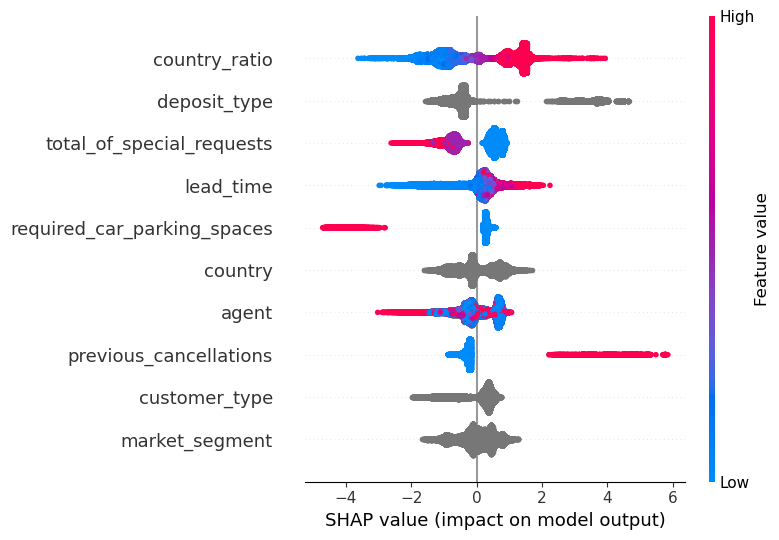

In [22]:
# Compute SHAP values
explainer = shap.Explainer(catboost_model, feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(X_train_filtered)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_train_filtered, max_display=10)

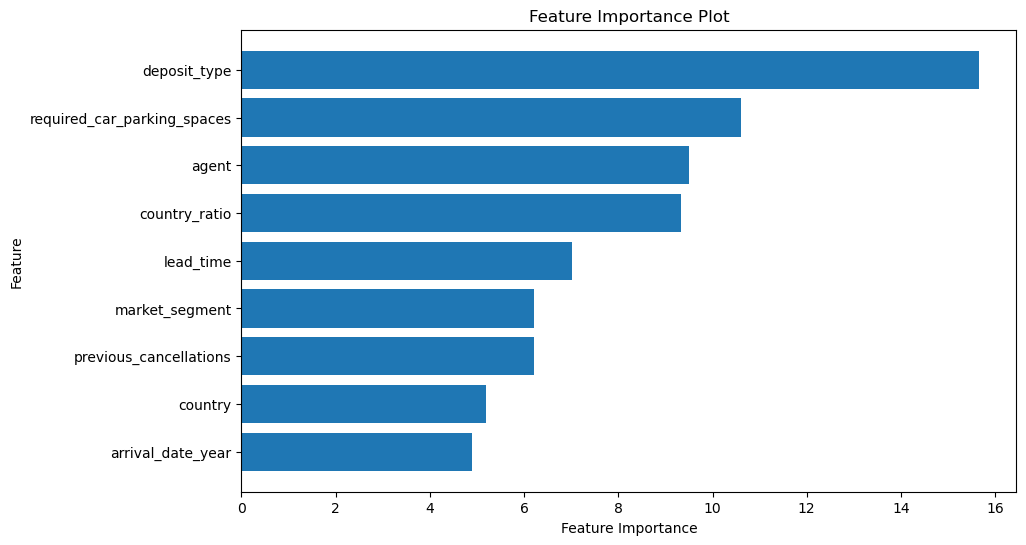

In [23]:
import matplotlib.pyplot as plt

# Compute feature importance
feature_importance = catboost_model.feature_importances_

# Get feature names
feature_names = catboost_model.feature_names_

fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
fi_df_sorted = fi_df.sort_values(by='Importance')

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(fi_df_sorted['Feature'][-9:], fi_df_sorted['Importance'][-9:])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
#plt.gca().invert_yaxis()
plt.show()

In [24]:
catboost_model.feature_names_

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'country_ratio']

In [ ]:
---------------------Rough Work Below-------------------

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
import shap


# Define column lists
numerical_cols = ['lead_time']
numerical_cols_scaling = ['adr']
impute_cols = ['children', 'agent', 'company']
frequent_impute_cols = ['country', 'arrival_date_month']
constant_impute_cols = ['meal']
categorical_cols = ['hotel', 'market_segment', 
                    'distribution_channel', 'reserved_room_type', 'assigned_room_type', 
                    'deposit_type', 'customer_type']
columns_to_drop = ['name', 'email', 'phone-number', 'credit_card', 'reservation_status_date', 'reservation_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['is_canceled']), df['is_canceled'], test_size=0.95, random_state=1)


class Debugger(BaseEstimator, TransformerMixin):

    def transform(self, data):

        # Here you just print what you need + return the actual data. You're not transforming anything. 

        print("Shape of Pre-processed Data:", data.shape)
        print(pd.DataFrame(data).head())
        return data

    def fit(self, data, y=None, **fit_params):

        # No need to fit anything, because this is not an actual  transformation. 

        return self


# Define preprocessing pipelines
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    #('scaler', StandardScaler())
])

numerical_scaling_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
    #,('debugger', Debugger())
])

specific_impute_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])

frequent_impute_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

constant_impute_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Create column transformer to apply pipelines to appropriate columns
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_cols),
    ('numerical_scaling', numerical_scaling_pipeline, numerical_cols_scaling),
    ('specific_impute', specific_impute_pipeline, impute_cols),
    ('frequent_impute', frequent_impute_pipeline, frequent_impute_cols),
    ('constant_impute', constant_impute_pipeline, constant_impute_cols),
    ('categorical', categorical_pipeline, categorical_cols),
    ('drop_columns', 'drop', columns_to_drop)
], remainder="passthrough")

'''
# to debug the transformed data, use this    
# Fit and transform the data

'''
X_preprocessed = preprocessor.fit_transform(X_train)
X_preprocessed

'''    
# Null values check
columns_with_nan = X_preprocessed.columns[X_preprocessed.isna().any()].tolist()
rows_with_nan = X_preprocessed[X_preprocessed.isna().any(axis=1)]
print("Columns with NaN values:", columns_with_nan)
print("Rows with NaN values:")
rows_with_nan.head()
'''
X_preprocessed

array([[ 2.90000000e+02, -8.09548615e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  5.66351101e-01],
       [ 1.13000000e+02, -6.02548052e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  5.66351101e-01],
       [ 5.90000000e+01,  2.09880930e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  5.66351101e-01],
       ...,
       [ 5.00000000e+01,  4.11754707e-01,  2.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  5.66351101e-01],
       [ 0.00000000e+00,  1.17765679e+00,  0.00000000e+00, ...,
         0.00000000e+00,  2.00000000e+00,  5.66351101e-01],
       [ 1.20000000e+02,  1.54453007e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  2.52615845e-01]])

In [41]:
xgb_model = XGBClassifier()
xgb_model.fit(X_preprocessed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
X_preprocessed.shape

(5969, 88)

In [43]:
#xgb_model.importance_type="gain"
dir(xgb_model)
#xgb_model.feature_names_in_

['_Booster',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_is_fitted__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_can_use_inplace_predict',
 '_check_feature_names',
 '_check_n_features',
 '_configure_fit',
 '_create_dmatrix',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_iteration_range',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_get_type',
 '_load_model_attributes',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_evaluation_result',

In [53]:
xgb_model.feature_names_in_

AttributeError: `feature_names_in_` is defined only when `X` has feature names that are all strings.

TypeError: the dtypes of parameters y (object) and height (float64) are incompatible

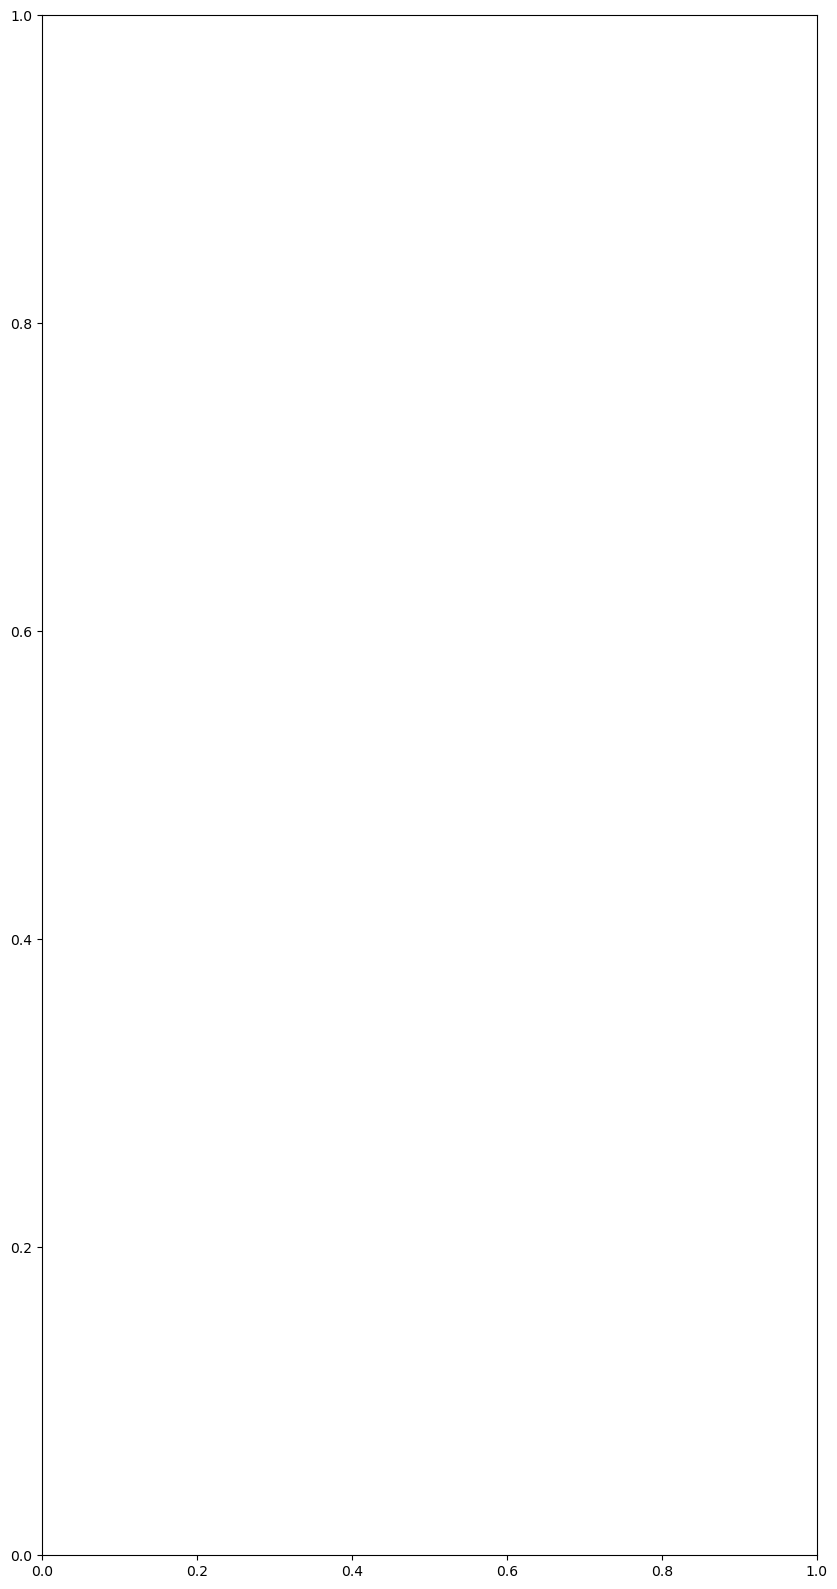

In [47]:
import matplotlib.pyplot as plt

# Compute feature importance
feature_importance = xgb_model.feature_importances_

# Get feature names
feature_names = xgb_model.get_booster().feature_names
#feature_names = xgb_model.booster_.feature_name()
#feature_names = xgb_model.feature_names_in_



fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
fi_df_sorted = fi_df.sort_values(by='Importance')

# Plot feature importance
plt.figure(figsize=(10, 20))
plt.barh(fi_df_sorted['Feature'][:], fi_df_sorted['Importance'][:])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
#plt.gca().invert_yaxis()
plt.show()

In [ ]:
fi_df_sorted

In [ ]:
xgb_model.feature_importances_ 

In [ ]:
fi_df_sorted['Feature_Cleaned'] = fi_df_sorted['Feature'].apply(lambda x: x.split('__')[1])

def get_matching_column(parts):
    j1 = '_'.join(parts)
    j2 = '_'.join(parts[:-1])
    j3 = '_'.join(parts[:-2])
    j4 = '_'.join(parts[:-3])
    for k in df.columns:
        if k == j1 or k == j2 or k == j3 or k == j4:
            return k
    return j1

fi_df_sorted['Feature_Cleaned2'] = fi_df_sorted['Feature_Cleaned'].apply(lambda x: get_matching_column(x.split('_')))
final_fi_df = fi_df_sorted.groupby('Feature_Cleaned2')['Importance'].agg('sum').reset_index()
final_fi_df = final_fi_df.sort_values(by='Importance')
final_fi_df

In [ ]:
# Plot feature importance
plt.figure(figsize=(8, 10))
plt.barh(final_fi_df['Feature_Cleaned2'][:], final_fi_df['Importance'][:])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
#plt.gca().invert_yaxis()
plt.show()

In [ ]:
---------------------------------------